# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
#Loading dataset:-

df=pd.read_csv('insurance_claims.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#Checking the total rows and total columns:

print(df.shape)

(1000, 40)


# Exploratory Data Analysis(EDA):-

In [7]:
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (1000, 40)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Description:-

In [9]:
df.describe(include='all')

months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       2006-01-01   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip  ... police_report_available  \
count     1.000000e+03    1000.000000  ...                    1000   
unique             NaN            NaN  ...                       3   
top                NaN            NaN  ...                       ?   
freq               NaN            NaN  ...                     343   
mean      1.101000e+06  501214.488000  ...                     NaN   
std       2.297407e+06   71701.610941  ...                     NaN   
min      -1.000000e+06  430104.000000  ...                     NaN   
25%       0.000000e+00  448404.500000  ...                     NaN   
50%       0.000000e+00  466445.500000  ...                     NaN   
75%       0.000000e+00  603251.000000  ...                     NaN   
max       1.000000e+07  620962.000000  ...                     NaN   

       total_claim_amount  injury_claim property_claim vehicle_claim  \
count          1000.00000   1000.000000    1000.000000   1000.000000   
unique                NaN           NaN            NaN           NaN   
top                   NaN           NaN            NaN           NaN   
freq                  NaN           NaN            NaN           NaN   
mean          52761.94000   7433.420000    7399.570000  37928.950000   
std           26401.53319   4880.951853    4824.726179  18886.252893   
min             100.00000      0.000000       0.000000     70.000000   
25%           41812.50000   4295.000000    4445.000000  30292.500000   
50%           58055.00000   6775.000000    6750.000000  42100.000000   
75%           70592.50000  11305.000000   10885.000000  50822.500000   
max          114920.00000  21450.000000   23670.000000  79560.000000   

        auto_make  auto_model    auto_year fraud_reported _c39  
count        1000        1000  1000.000000           1000  0.0  
unique         14          39          NaN              2  NaN  
top          Saab         RAM          NaN              N  NaN  
freq           80          43          NaN            753  NaN  
mean          NaN         NaN  2005.103000            NaN  NaN  
std           NaN         NaN     6.015861            NaN  NaN  
min           NaN         NaN  19

In [10]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [11]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

# Finding Null values:-

In [13]:
#checking null values in dataset:-

print(df.isna().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

* Here _c39 having all null values, So lets drop _c39 column.

In [14]:
df.drop('_c39',axis=1,inplace=True)

In [15]:
print(df.isna().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

* All null values have been removed.

<Axes: >

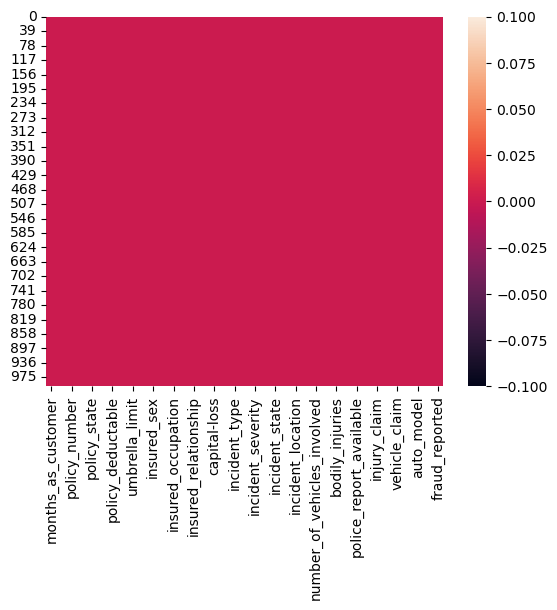

In [16]:
sns.heatmap(df.isnull())

# Data Analysis and Visualization:-

# Univarient:

In [17]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [18]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 21
Number of Continuous features: 18


([<matplotlib.patches.Wedge at 0x24f2457eaa0>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Categorical'),
  Text(0.13259054489339886, -1.0919797376347566, 'Continuous')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.85%'),
  Text(0.07232211539639936, -0.5956253114371399, '46.15%')])

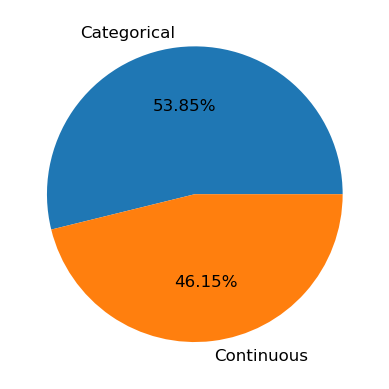

In [19]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%.2f%%')

# Target variable- Fraud Detected

In [20]:
df['fraud_reported'].value_counts(dropna=False)

N    753
Y    247
Name: fraud_reported, dtype: int64

In [21]:
target=df['fraud_reported'].value_counts()*100/df.shape[0]
target

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [22]:
df['fraud_reported'].value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

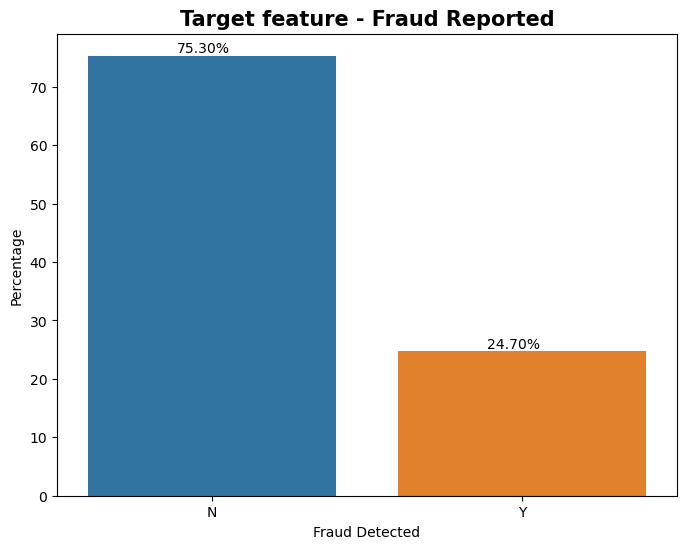

In [23]:
plt.figure(figsize=(8,6))
plt.title('Target feature - Fraud Reported', fontdict={'fontweight':'bold','fontsize':15})
ax=sns.barplot(x=target.index, y=target.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8, height+0.5, f'{height:.2f}%')

# Age and Age VS Target column:

<Axes: xlabel='age', ylabel='Density'>

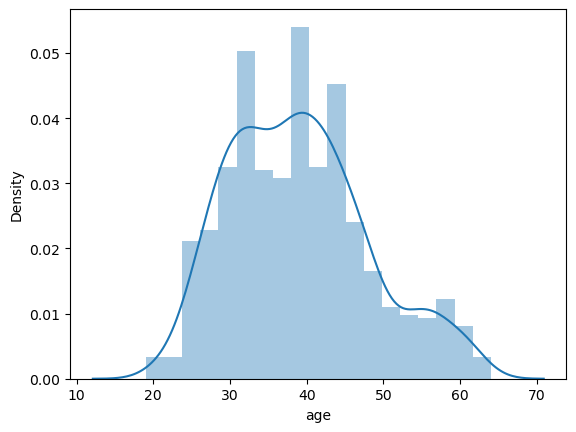

In [24]:
sns.distplot(df['age'])

Text(0, 0.5, 'Fraud Reported')

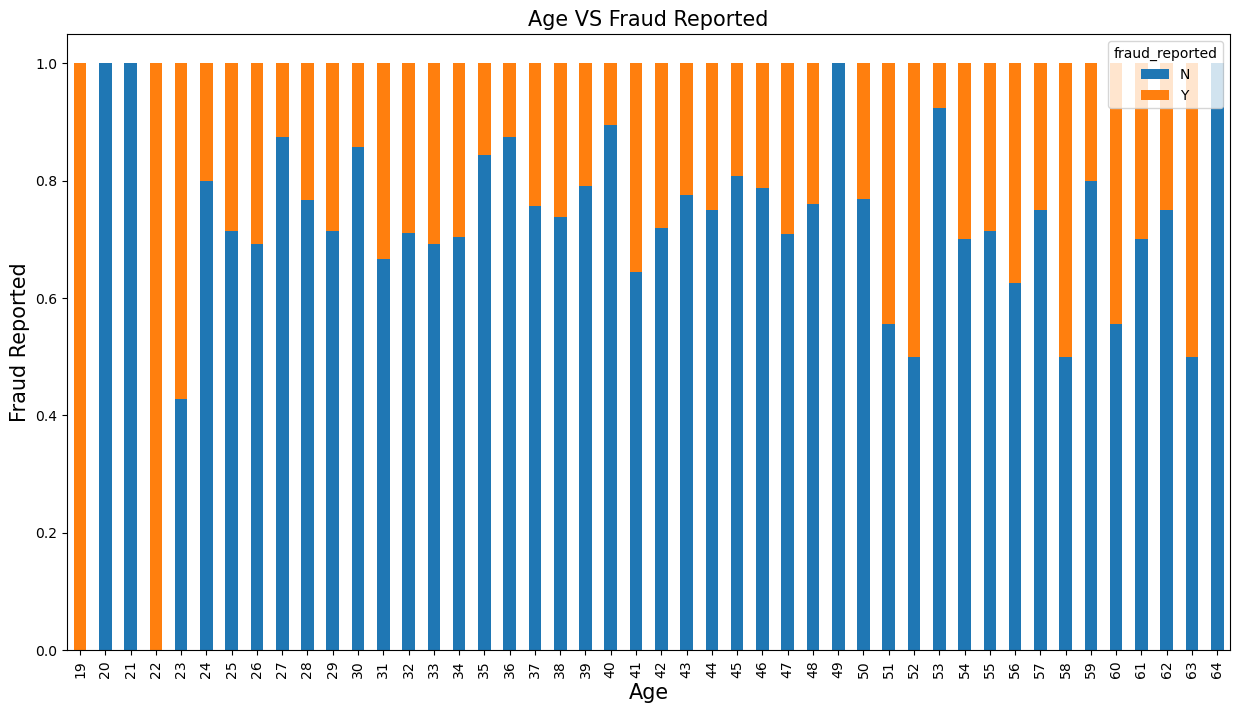

In [25]:
plt.rcParams['figure.figsize']=[15,8]
table=pd.crosstab(df['age'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age VS Fraud Reported',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# policy_number:

In [26]:
df['policy_number'].nunique()

1000

* Policy number is not relevant to find fraud.

# policy_bind_date:

In [27]:
df['policy_bind_date'].nunique()

951

In [28]:
df['policy_bind_date'].value_counts(dropna=False)

2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64

# policy_state:

In [29]:
df['policy_state'].nunique()

3

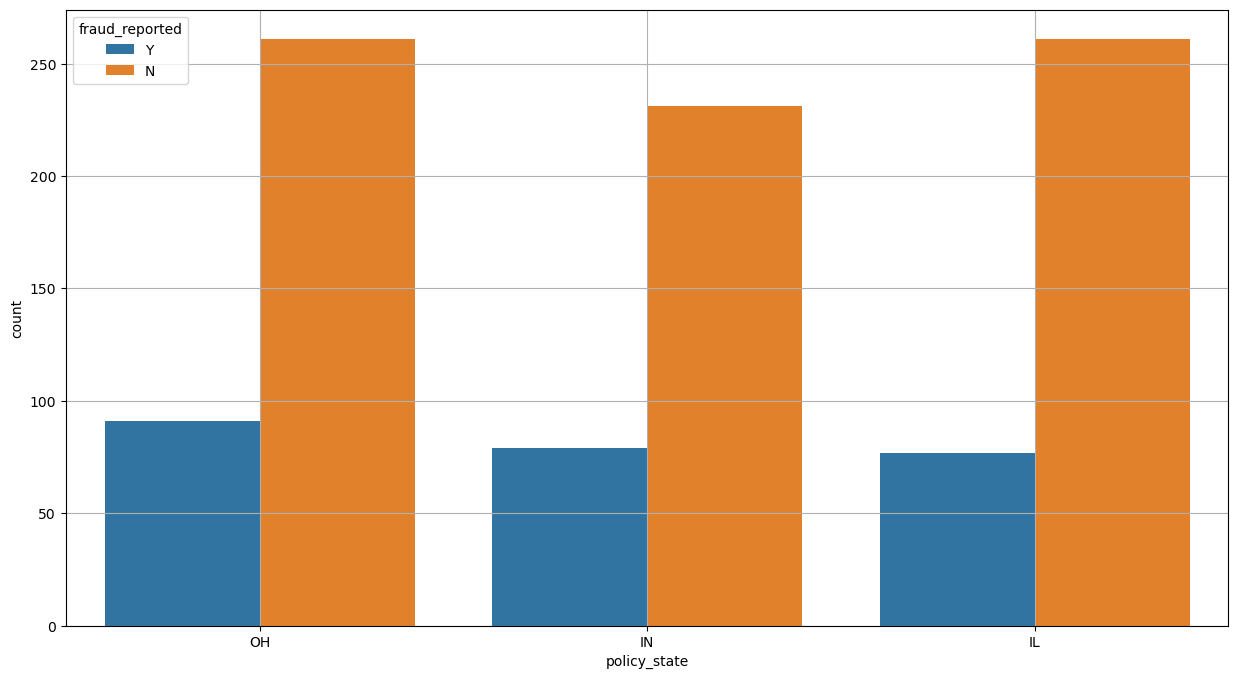

In [30]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)
plt.grid()

Text(0, 0.5, 'Fraud Reported')

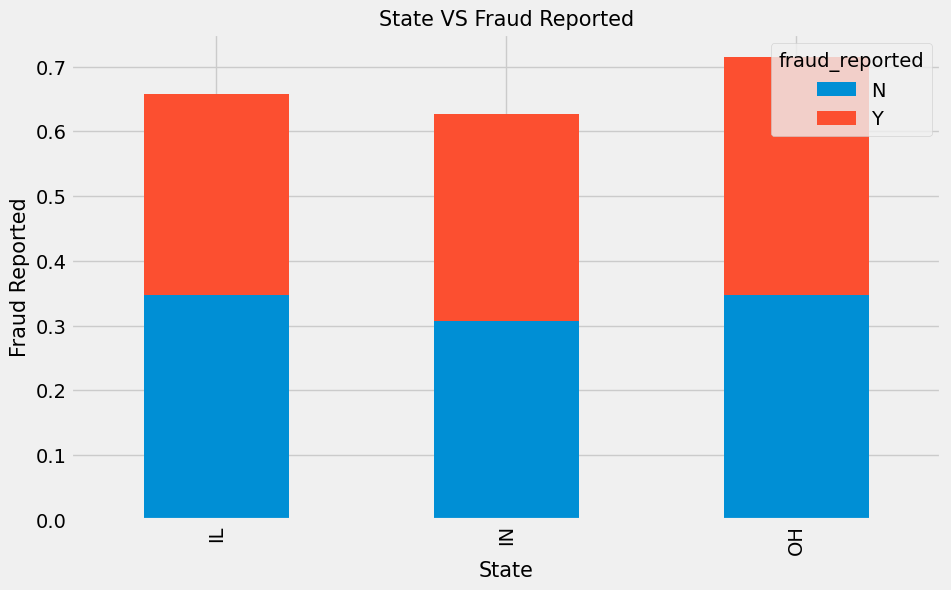

In [31]:
plt.rcParams['figure.figsize']=[10,6]
plt.style.use('fivethirtyeight')
table=pd.crosstab(df['policy_state'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title('State VS Fraud Reported',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# incident_state VS Target variable:

In [32]:
df['incident_state'].nunique()

7

In [33]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

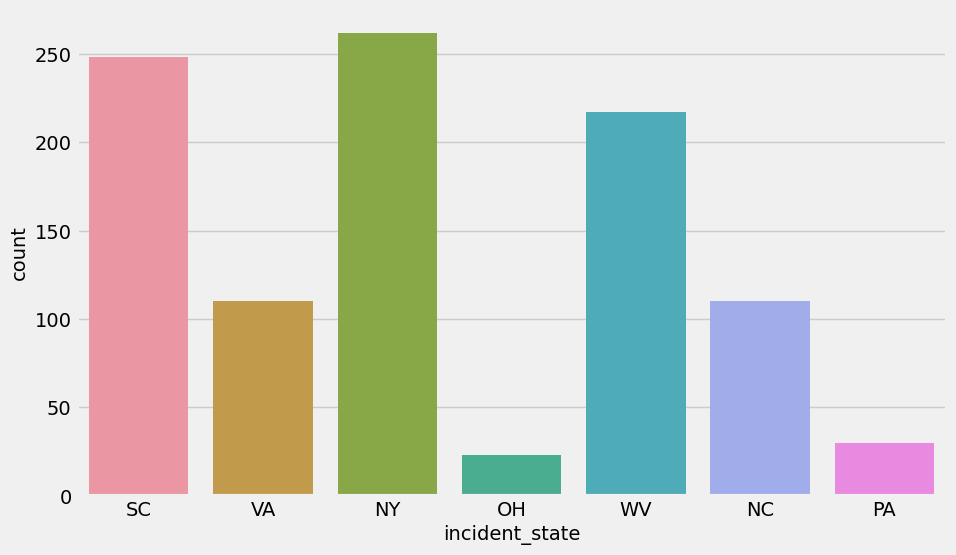

In [34]:
sns.countplot(x='incident_state',data=df)

Text(0, 0.5, 'Fraud Reported')

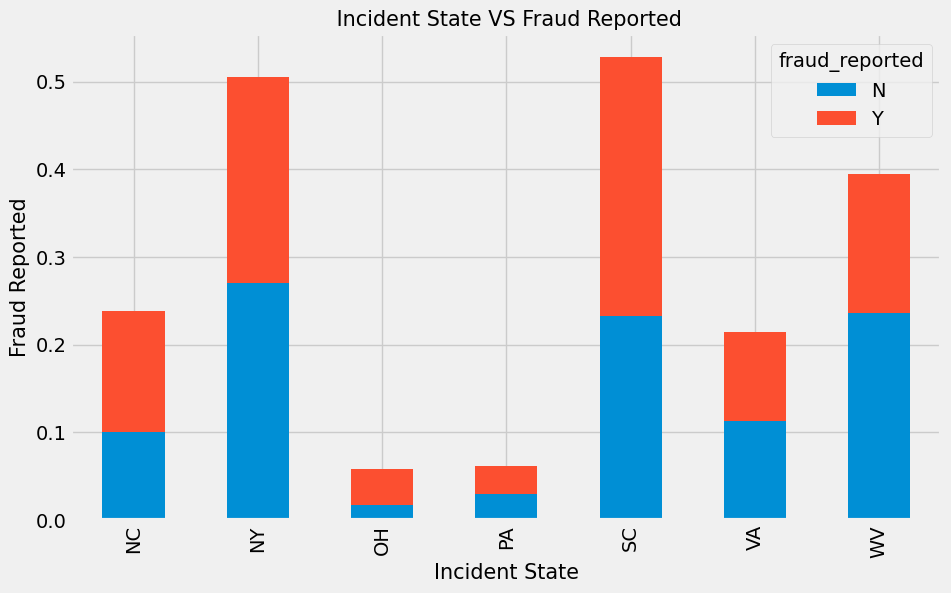

In [35]:
plt.rcParams['figure.figsize']=[10,6]
plt.style.use('fivethirtyeight')
table=pd.crosstab(df['incident_state'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title(' Incident State VS Fraud Reported',fontsize=15)
plt.xlabel('Incident State',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# incident_date vs Target Variable:

2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-01-10    24
2015-02-04    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-13    21
2015-01-30    21
2015-02-12    20
2015-02-22    20
2015-01-31    20
2015-02-06    20
2015-02-21    19
2015-01-01    19
2015-02-23    19
2015-01-12    19
2015-01-14    19
2015-01-21    19
2015-01-03    18
2015-02-14    18
2015-02-01    18
2015-02-28    18
2015-01-20    18
2015-01-18    18
2015-02-25    18
2015-01-06    17
2015-01-09    17
2015-02-08    17
2015-02-24    17
2015-02-26    17
2015-02-13    16
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-01-17    15
2015-02-18    15
2015-01-28    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-01-23    13
2015-02-03    13
2015-01-27    13
2015-02-09    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-19    10
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-01-25    10
2015-01-11    

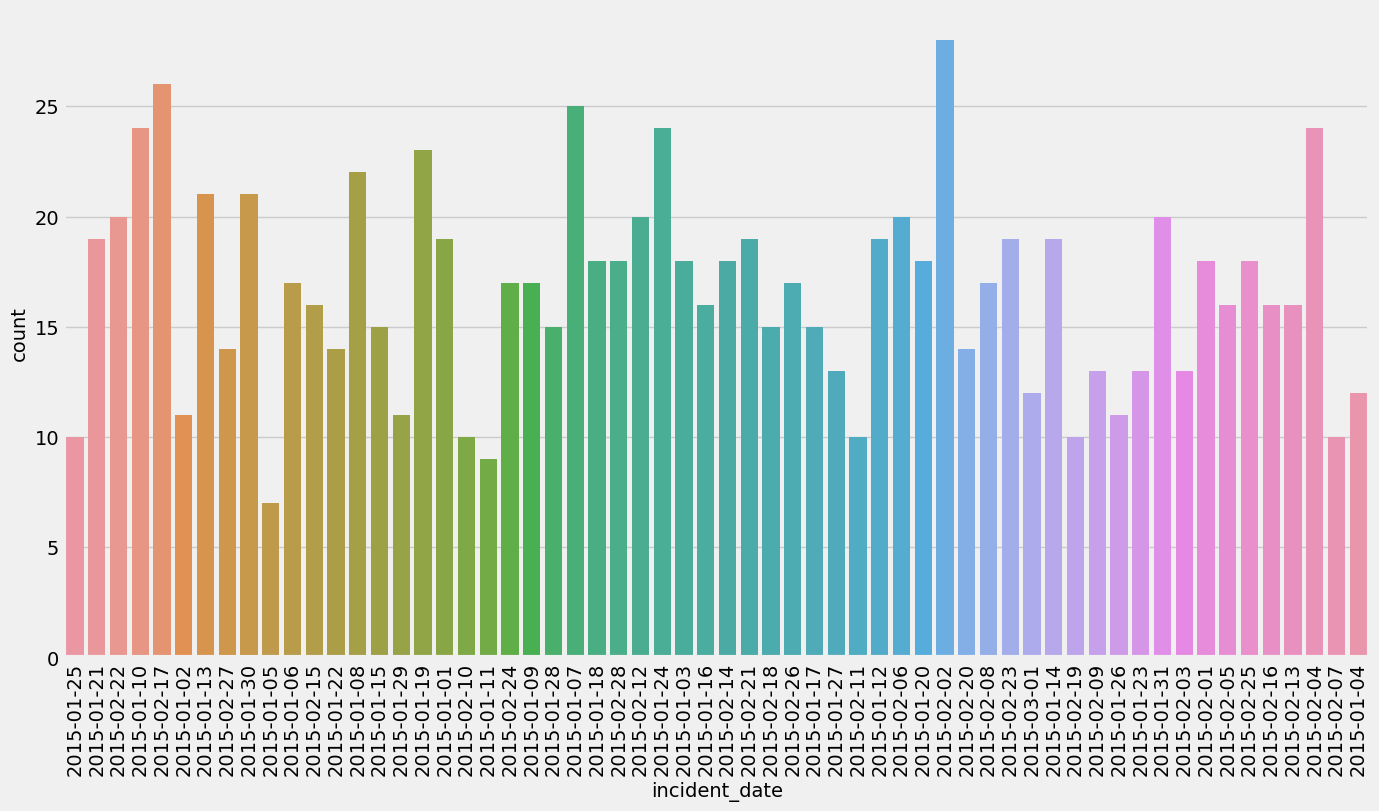

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='incident_date',data=df)
plt.xticks(rotation=90)
print(df['incident_date'].value_counts())

* All cases reported on the month of January and Feb of 2015, few in March only.

Text(0, 0.5, 'Fraud Reported')

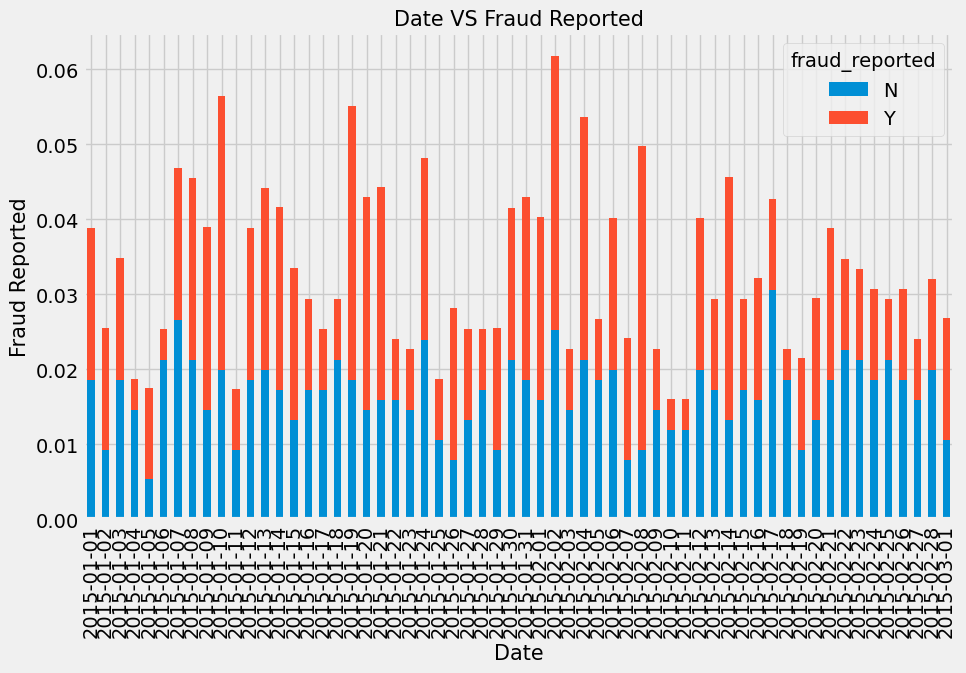

In [37]:
plt.rcParams['figure.figsize']=[10,6]
plt.style.use('fivethirtyeight')
table=pd.crosstab(df['incident_date'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title('Date VS Fraud Reported',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# incident_type vs Fraud:

In [38]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [39]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<Axes: xlabel='incident_type', ylabel='count'>

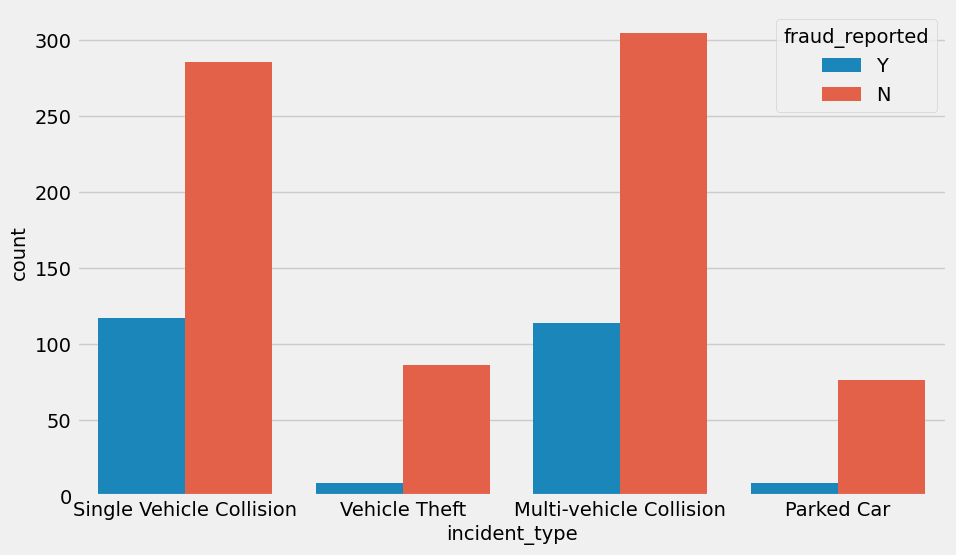

In [40]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

Text(0, 0.5, 'Percentage')

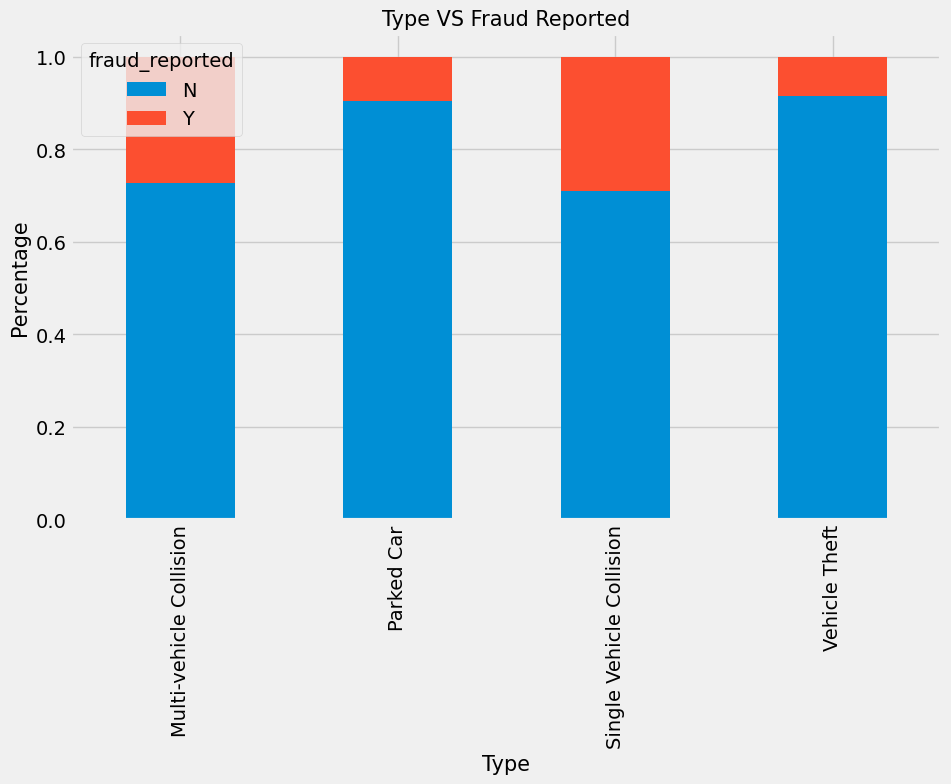

In [41]:

table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Type VS Fraud Reported',fontsize=15)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

# collision_type:

In [42]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [43]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [44]:
df['collision_type'].replace('?',np.nan,inplace=True)
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Text(0, 0.5, 'Percentage')

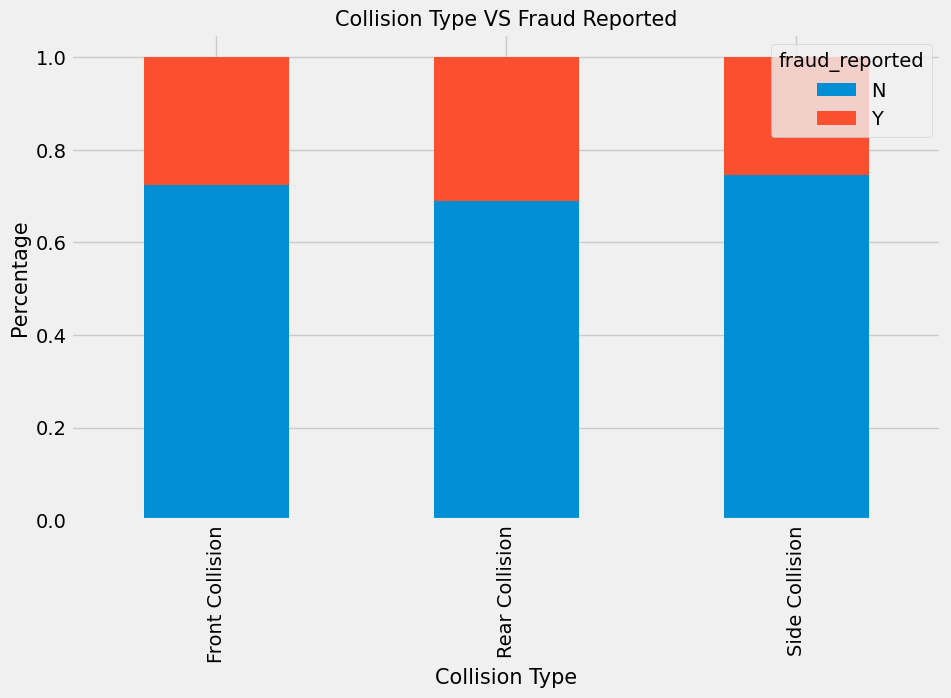

In [45]:
table=pd.crosstab(df['collision_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Collision Type VS Fraud Reported',fontsize=15)
plt.xlabel('Collision Type',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

# incident_severity:

In [46]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [47]:
df['incident_severity'].value_counts(normalize=True)

Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64

<Axes: xlabel='incident_severity', ylabel='count'>

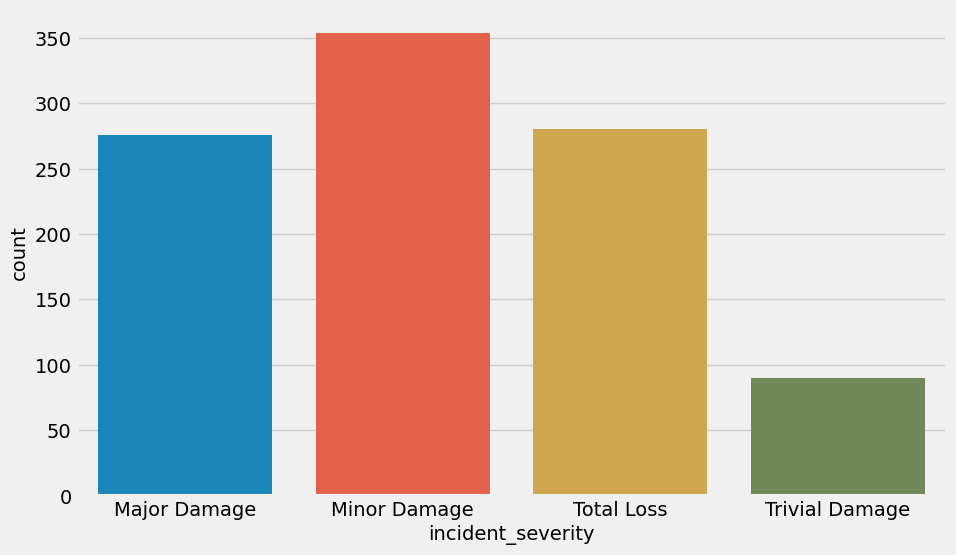

In [48]:
sns.countplot(x='incident_severity',data=df)

<Axes: xlabel='incident_severity', ylabel='count'>

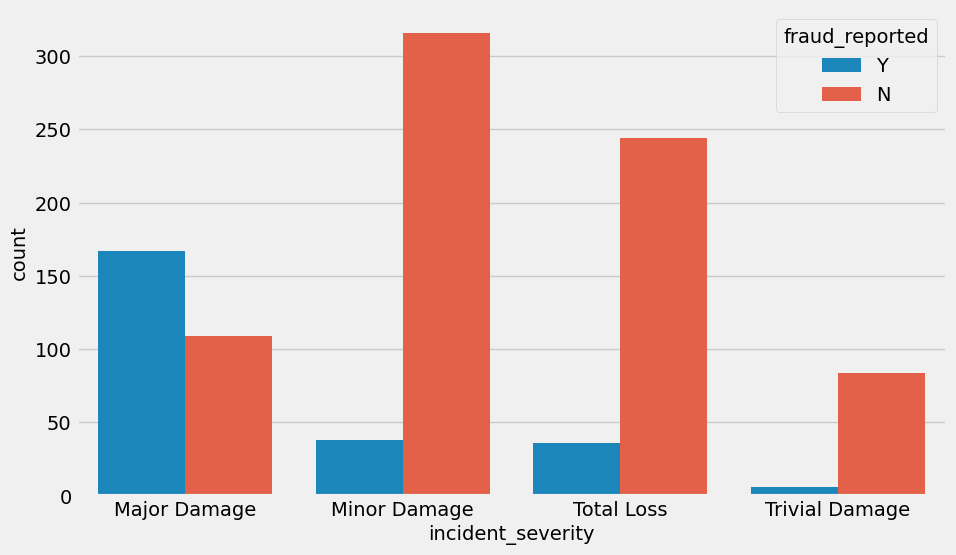

In [49]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

# authorities_contacted vd fraud reported:

In [50]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [51]:
df['authorities_contacted'].value_counts(normalize=True)

Police       0.292
Fire         0.223
Other        0.198
Ambulance    0.196
None         0.091
Name: authorities_contacted, dtype: float64

<Axes: xlabel='authorities_contacted', ylabel='count'>

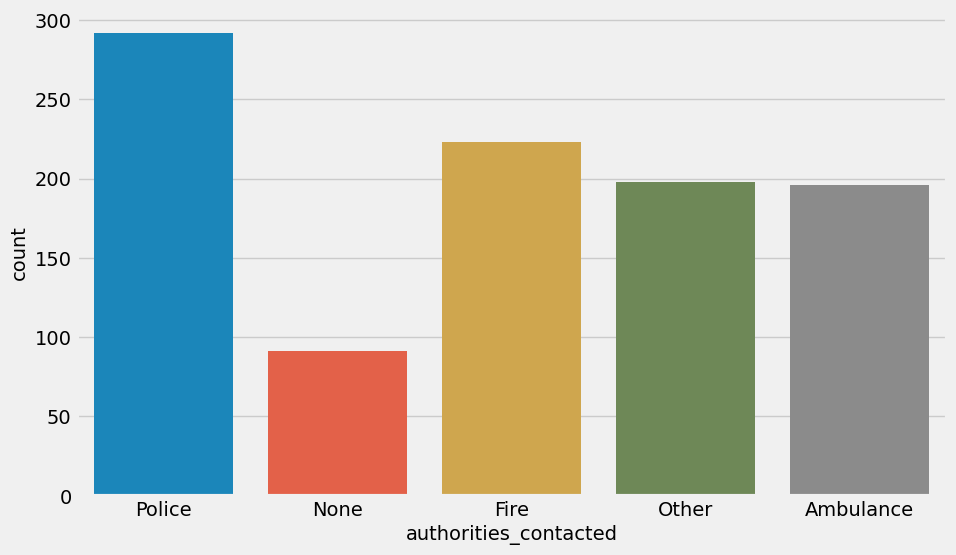

In [52]:
sns.countplot(x='authorities_contacted',data=df)

<Axes: xlabel='authorities_contacted', ylabel='count'>

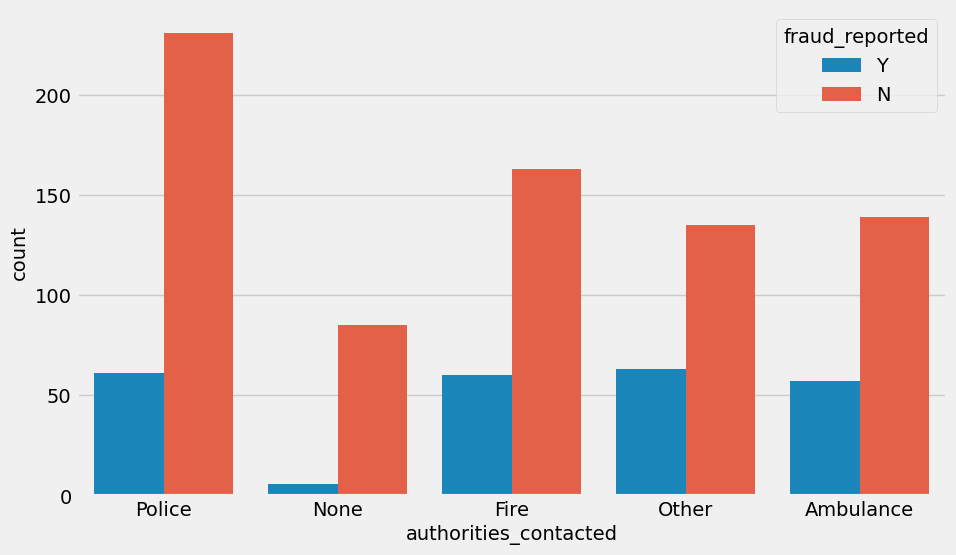

In [53]:
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

# number_of_vehicles_involved:

In [54]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

In [55]:
df['number_of_vehicles_involved'].value_counts(normalize=True)

1    0.581
3    0.358
4    0.031
2    0.030
Name: number_of_vehicles_involved, dtype: float64

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

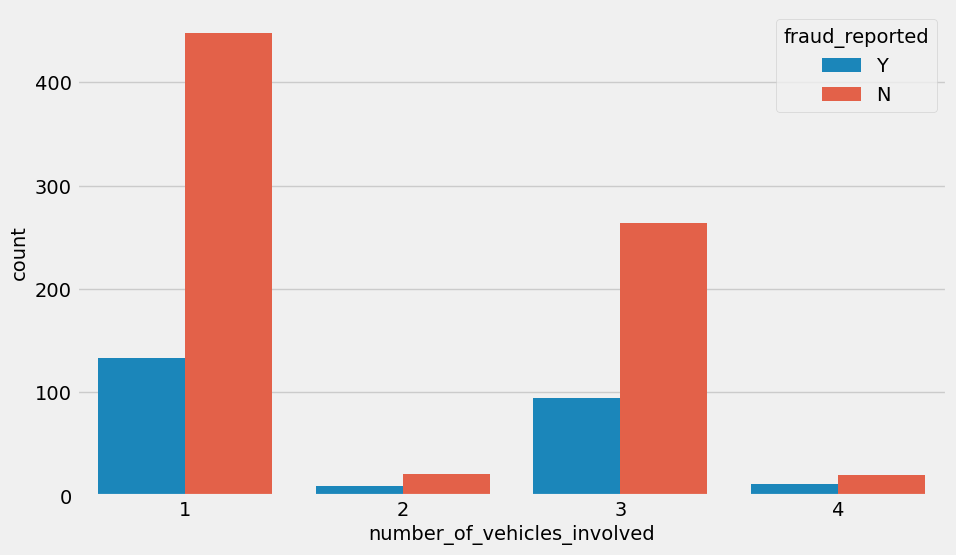

In [56]:
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

# property_damage:

In [57]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [58]:
df['property_damage'].replace('?',np.nan,inplace=True)
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [59]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

<Axes: xlabel='property_damage', ylabel='count'>

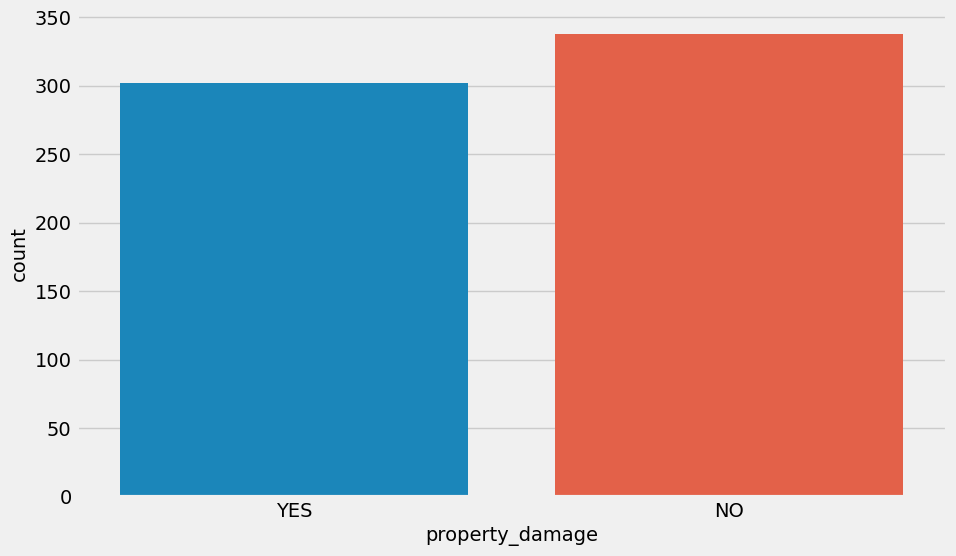

In [60]:
sns.countplot(x='property_damage',data=df)

<Axes: xlabel='property_damage', ylabel='count'>

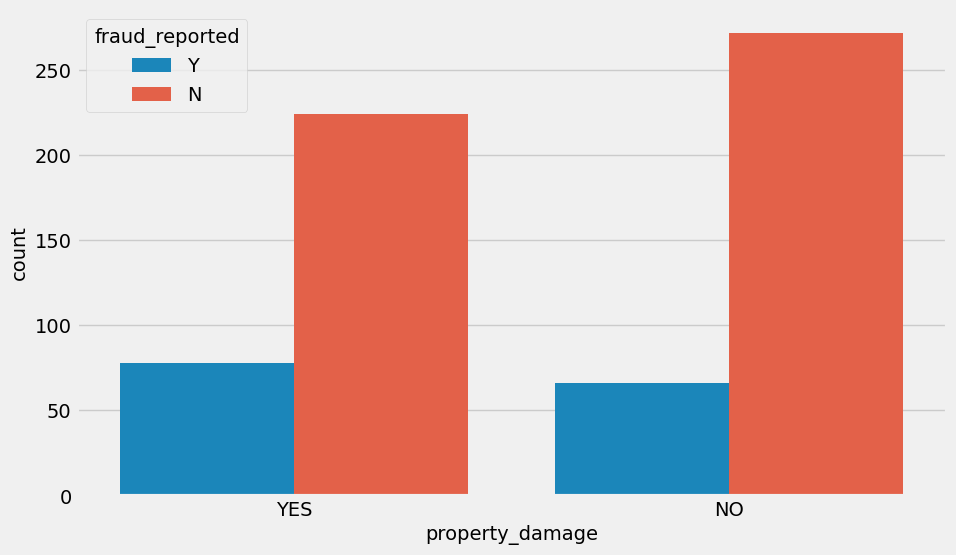

In [61]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

In [62]:
df.replace('?',np.nan,inplace=True)

# bodily_injuries:

In [63]:
df['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

In [64]:
df['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

<Axes: xlabel='bodily_injuries', ylabel='count'>

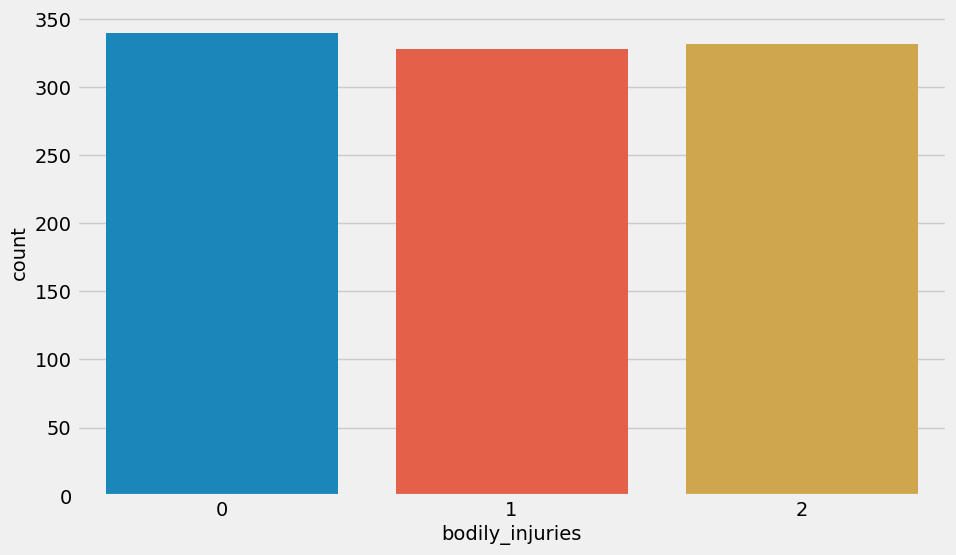

In [65]:
sns.countplot(x='bodily_injuries',data=df)

<Axes: xlabel='bodily_injuries', ylabel='count'>

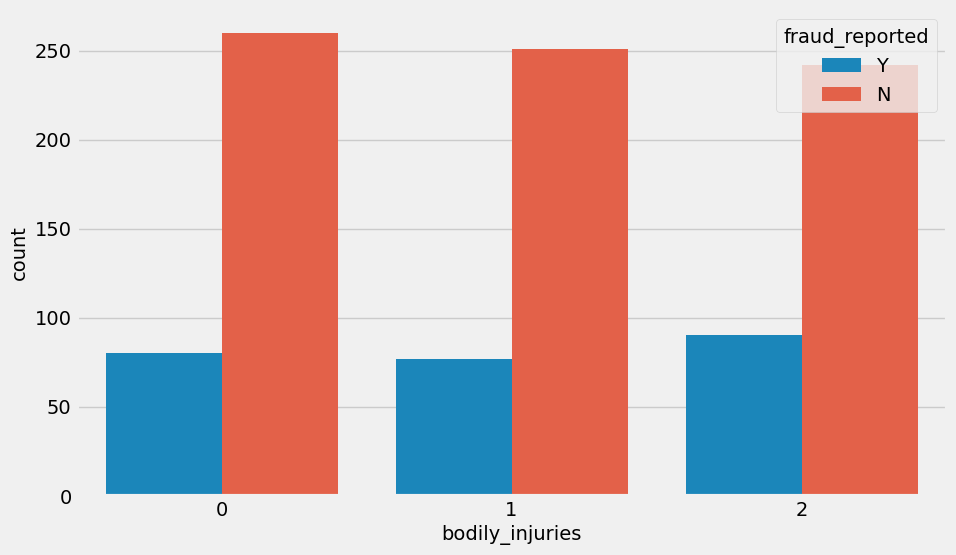

In [66]:
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=df)

# witnesses:

In [67]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

In [68]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<Axes: xlabel='witnesses', ylabel='count'>

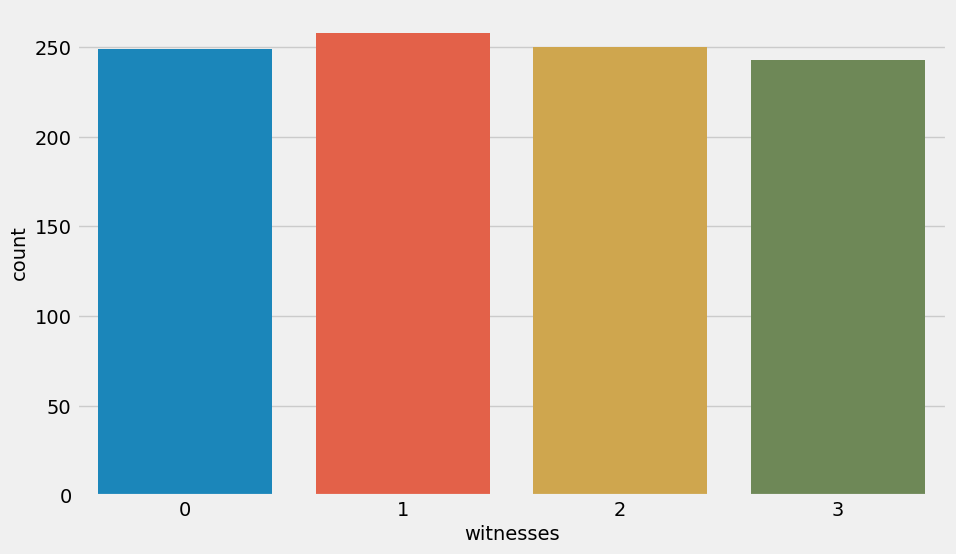

In [69]:
sns.countplot(x='witnesses',data=df)

<Axes: xlabel='witnesses', ylabel='count'>

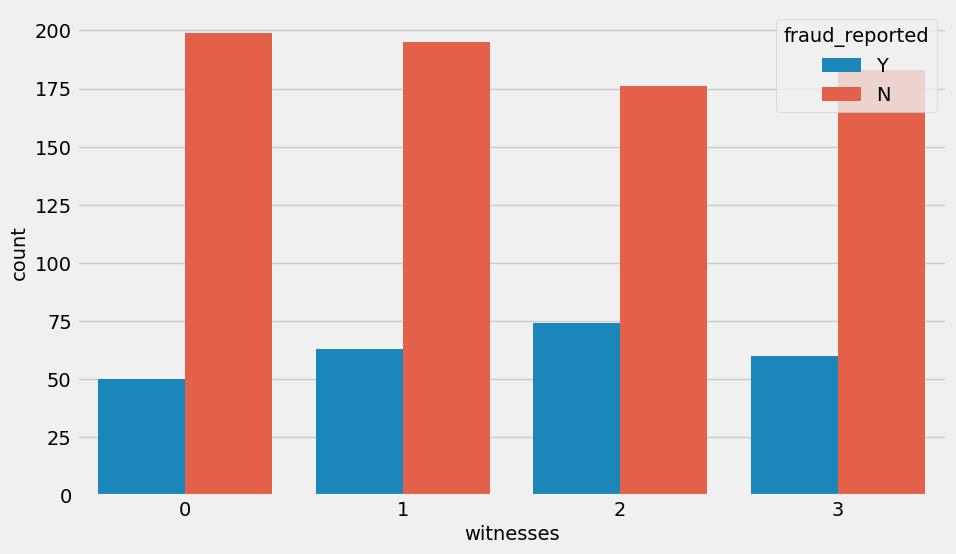

In [70]:
sns.countplot(x='witnesses',hue='fraud_reported',data=df)

# police_report_available:

In [71]:
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [72]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

<Axes: xlabel='police_report_available', ylabel='count'>

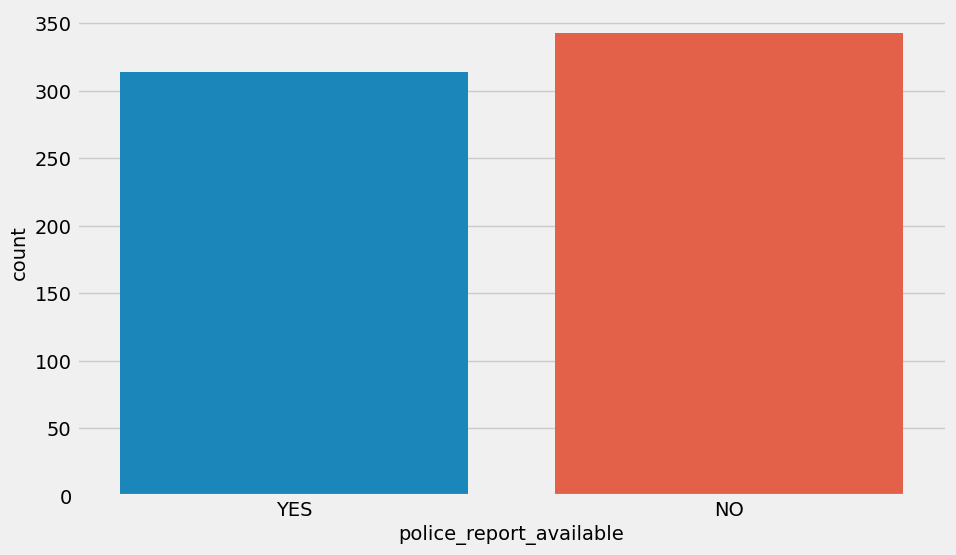

In [73]:
sns.countplot(x='police_report_available',data=df)

<Axes: xlabel='police_report_available', ylabel='count'>

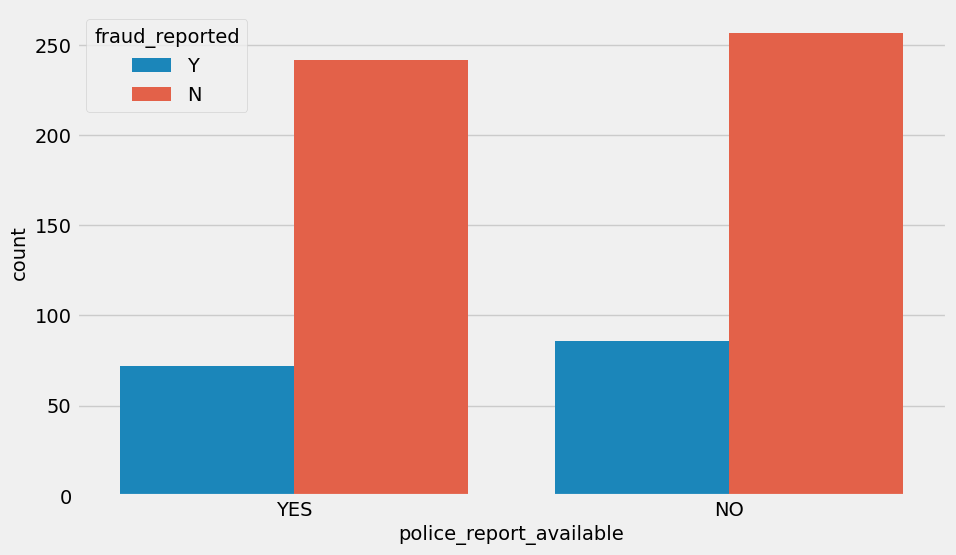

In [74]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

# Vehicle Detail:-

# auto_make:

In [75]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [76]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

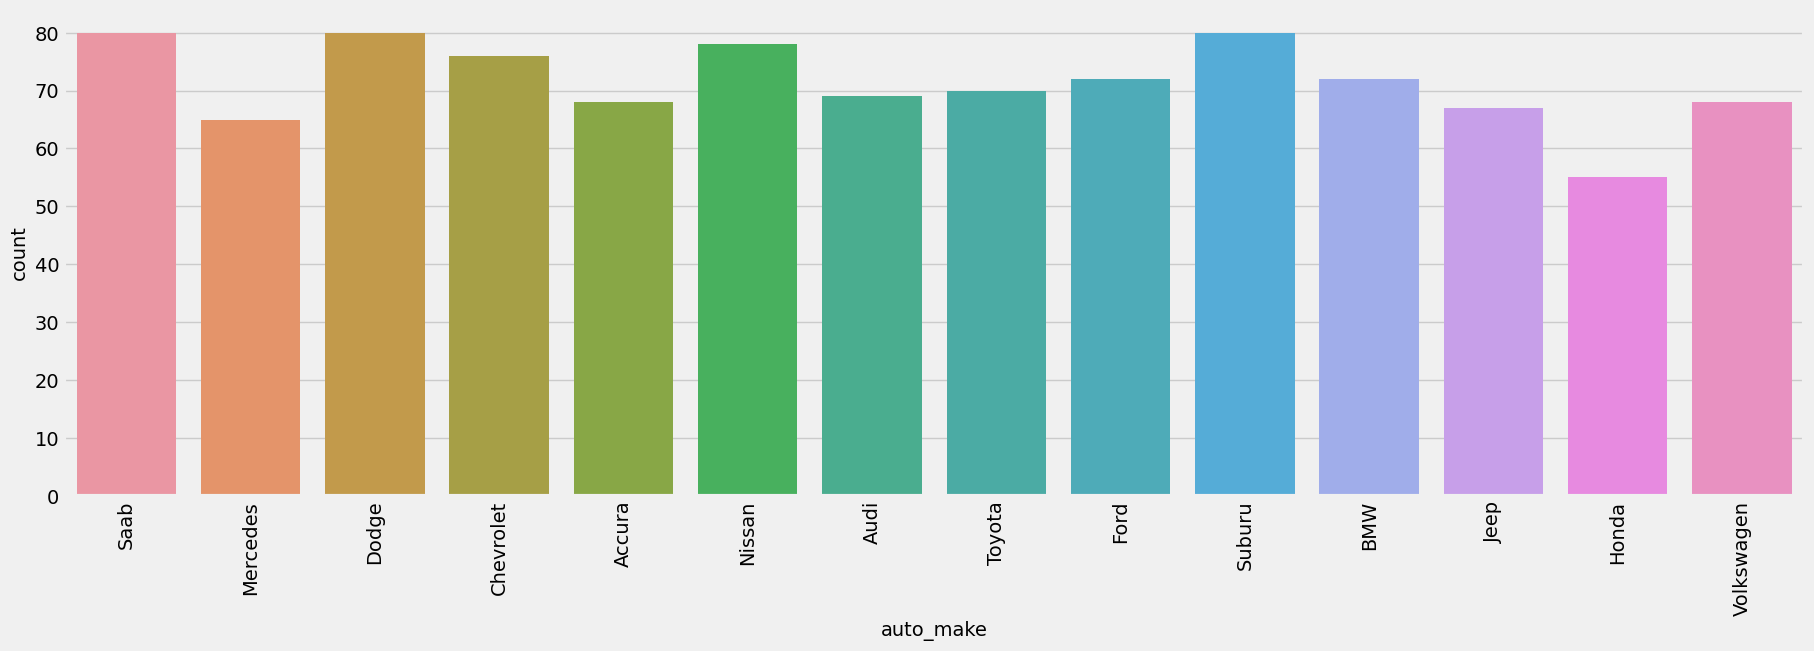

In [77]:
plt.figure(figsize=(20,6))
sns.countplot(x='auto_make',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

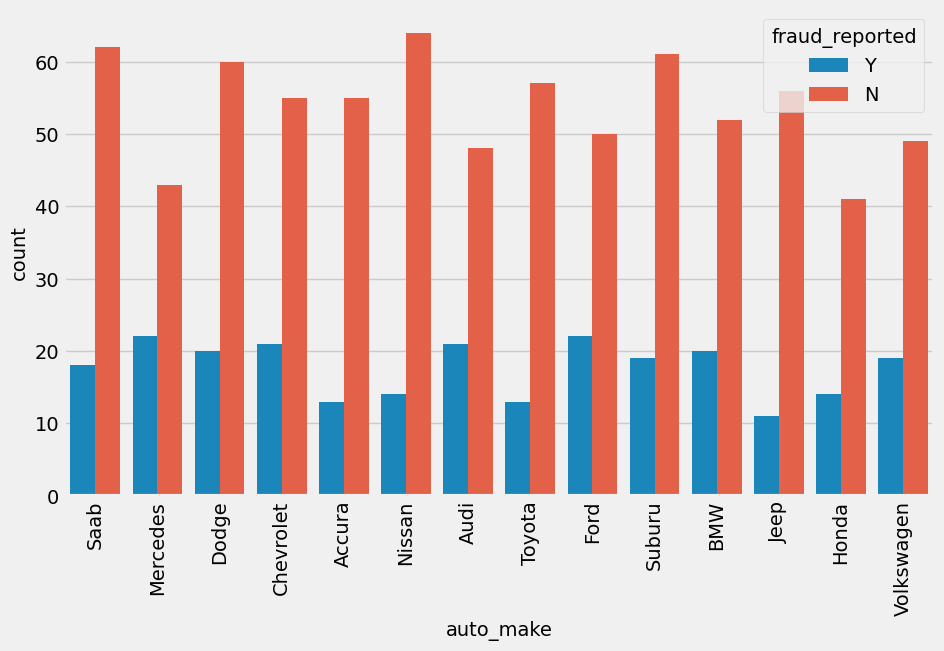

In [78]:
sns.countplot(x='auto_make',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

# auto_model:

In [79]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [80]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

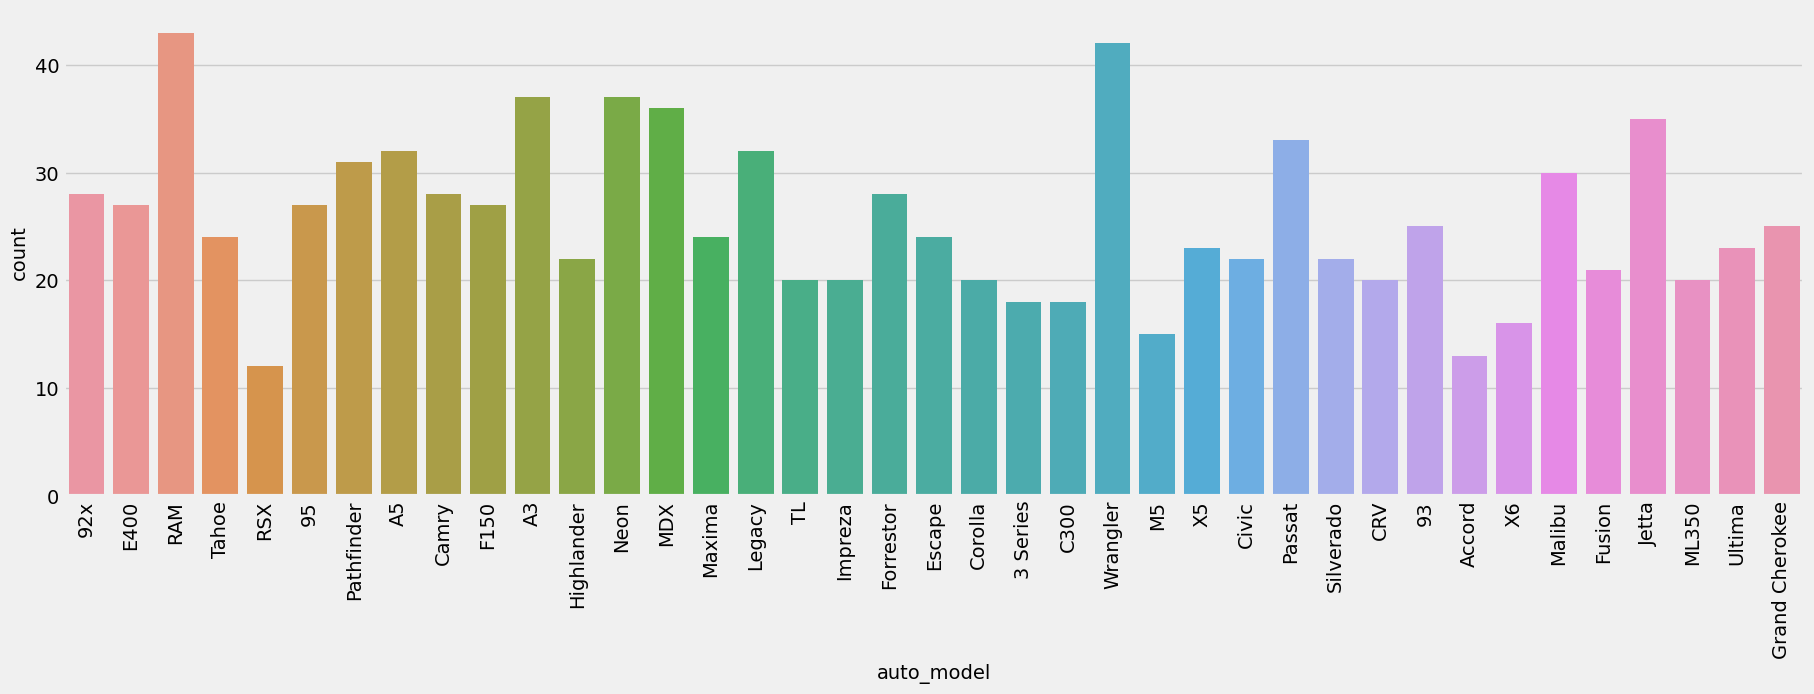

In [81]:
plt.figure(figsize=(20,6))
sns.countplot(x='auto_model',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

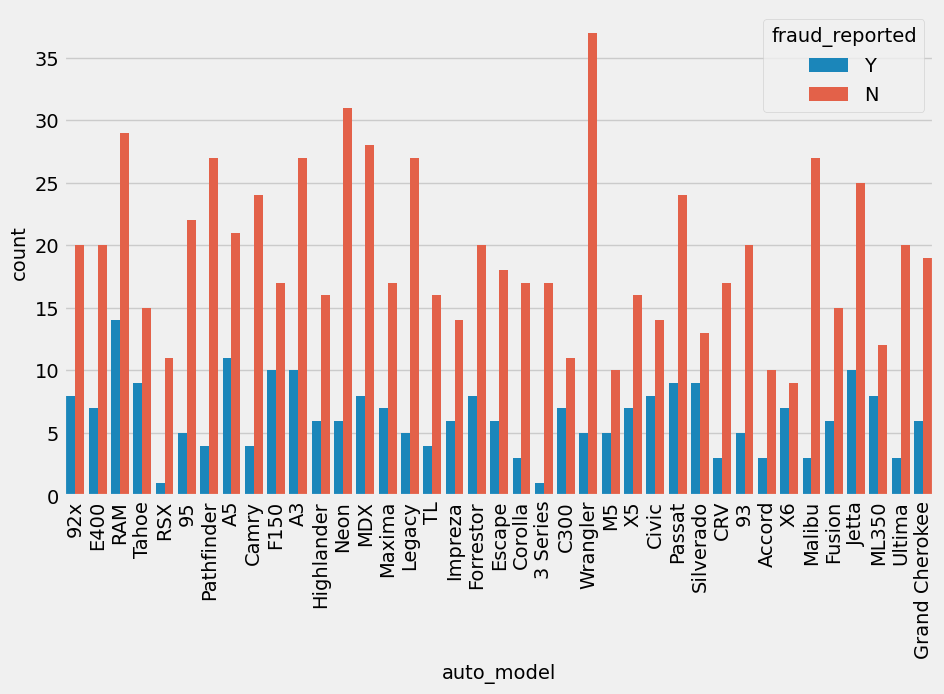

In [82]:
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Auto Model VS Fraud Reported')

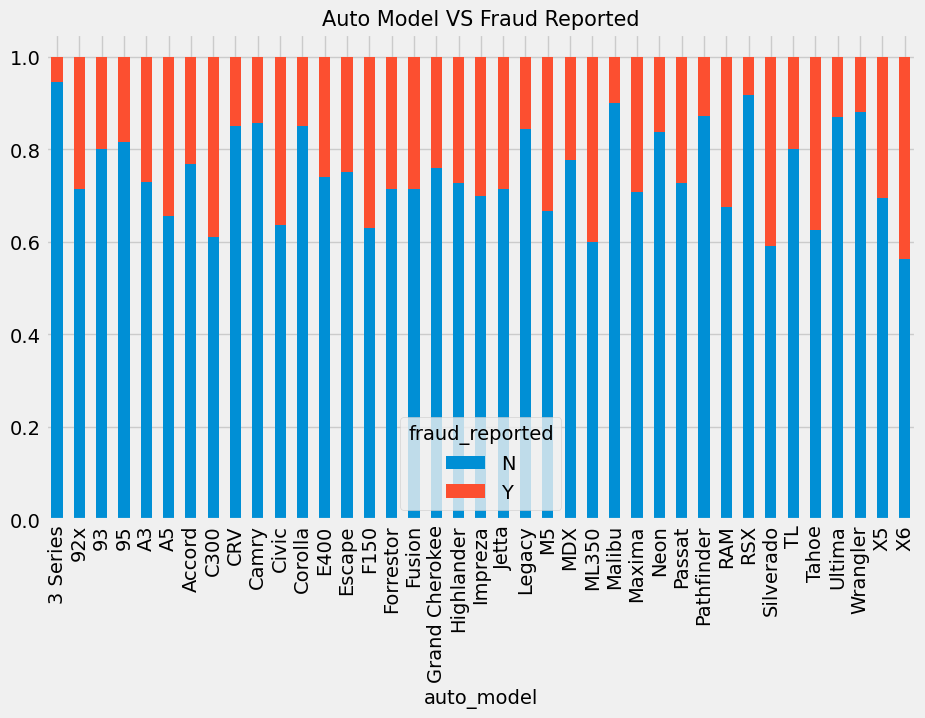

In [83]:
table=pd.crosstab(df['auto_model'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Auto Model VS Fraud Reported',fontsize=15)

# auto_year:

In [84]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [85]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

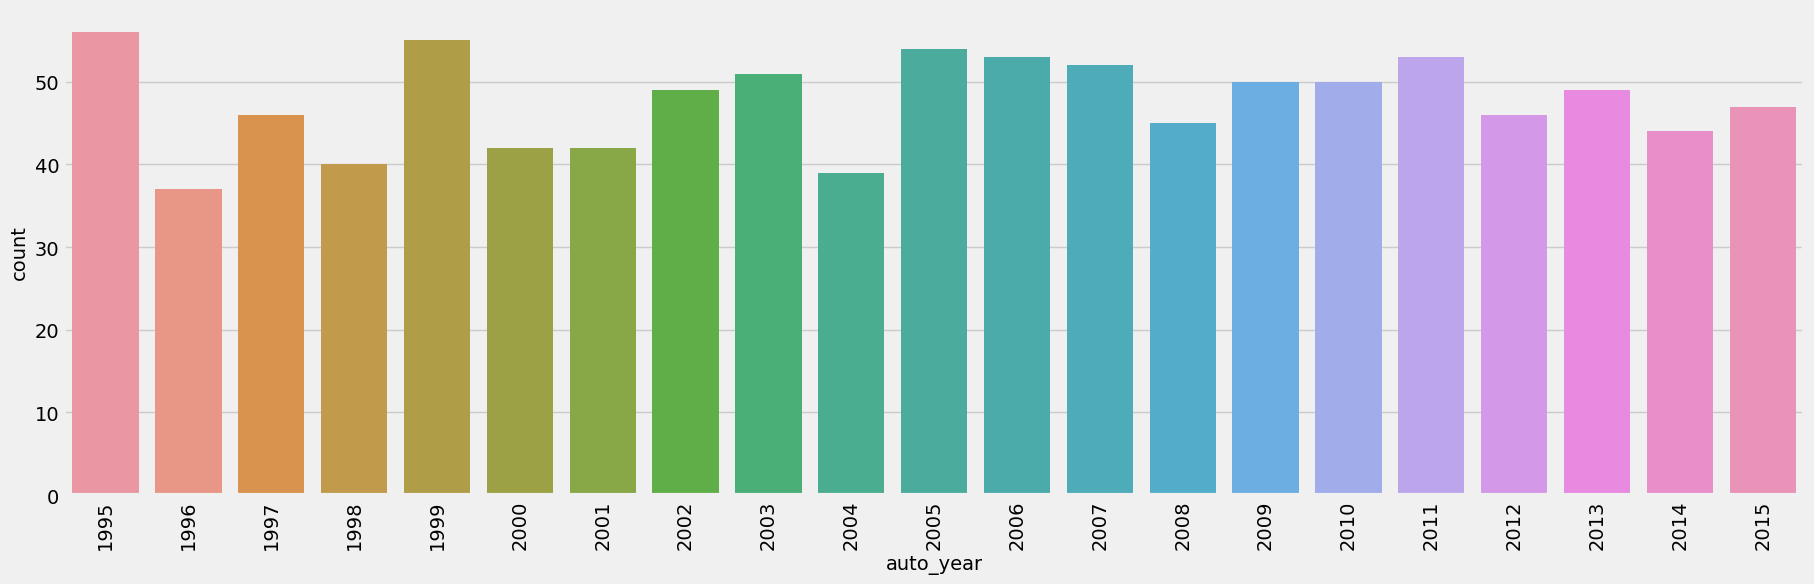

In [86]:
plt.figure(figsize=(20,6))
sns.countplot(x='auto_year',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

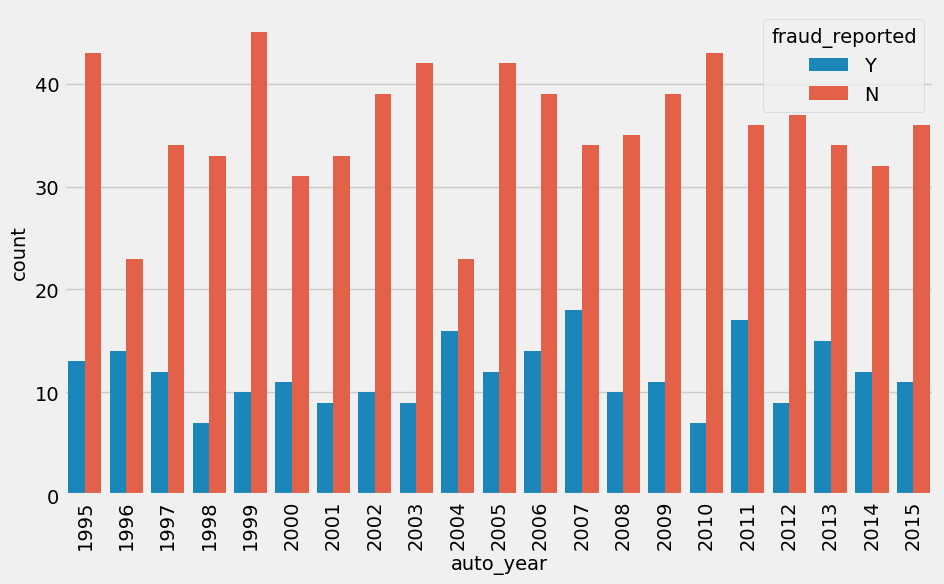

In [87]:
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

# Insured Person:-

# insured_sex:

In [88]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [89]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

([<matplotlib.patches.Wedge at 0x24f2ac3c3a0>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.70%'),
  Text(0.0695864077781283, -0.5959511153211613, '46.30%')])

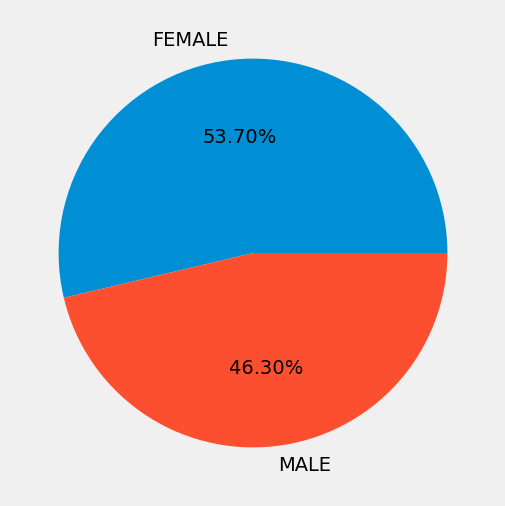

In [90]:
plt.pie(df['insured_sex'].value_counts().values,labels=df['insured_sex'].value_counts().index,autopct='%1.2f%%')

(array([0, 1]), [Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')])

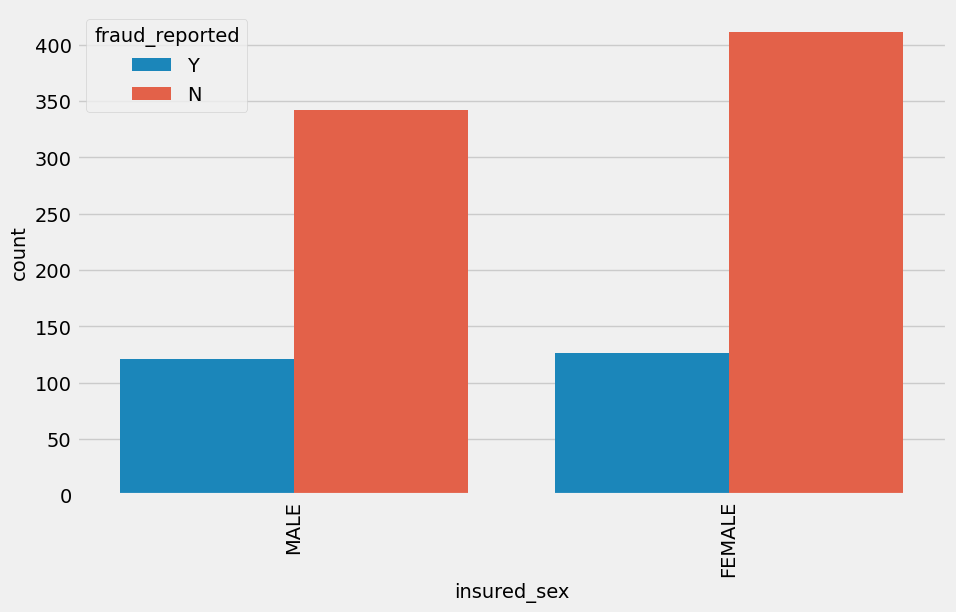

In [91]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

# insured_education_level:

In [92]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [93]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

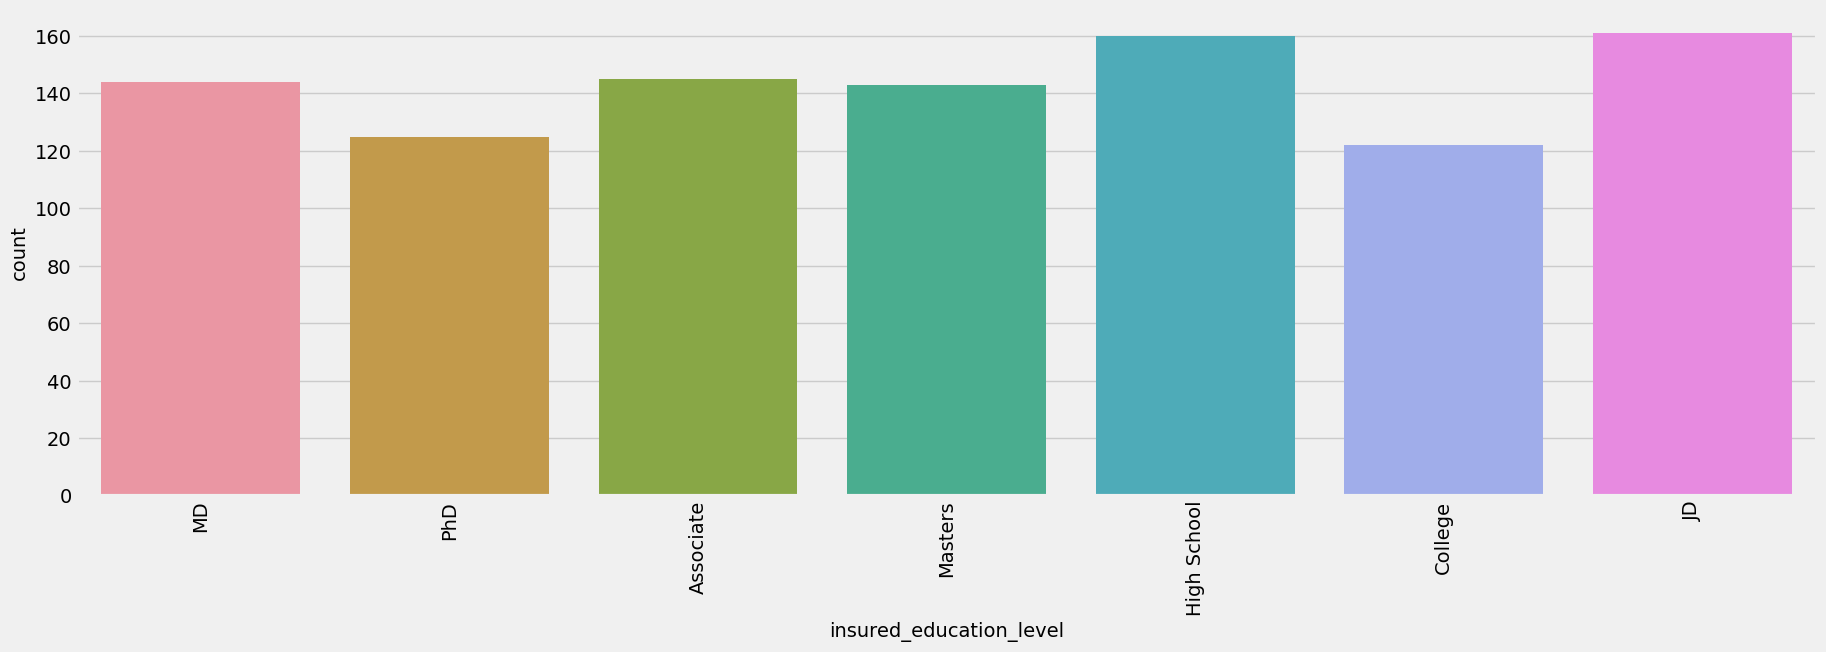

In [94]:
plt.figure(figsize=(20,6))
sns.countplot(x='insured_education_level',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='insured_education_level'>

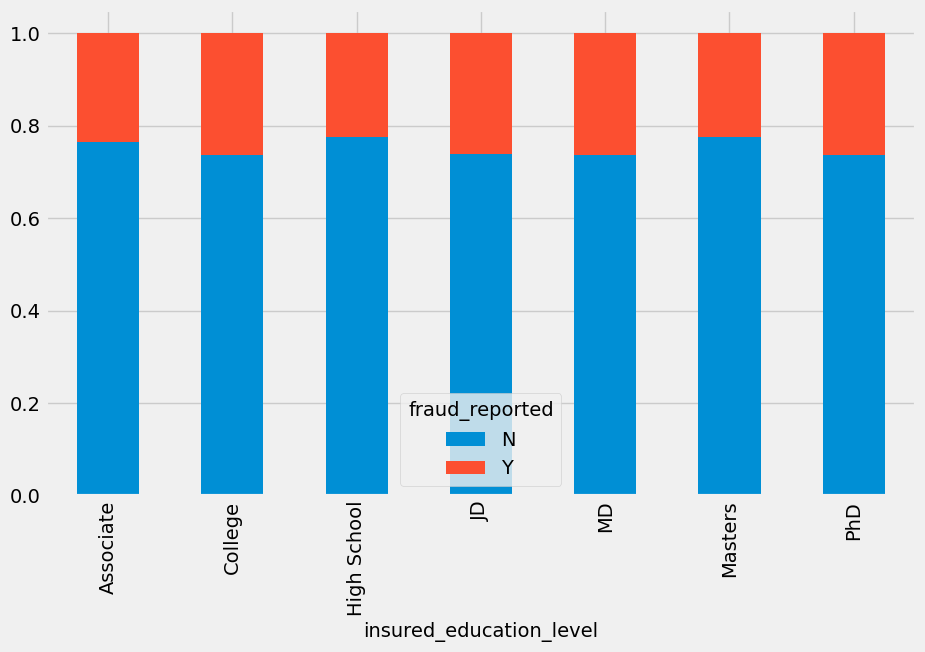

In [95]:
table=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_occupation:

In [96]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [97]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<Axes: xlabel='insured_occupation'>

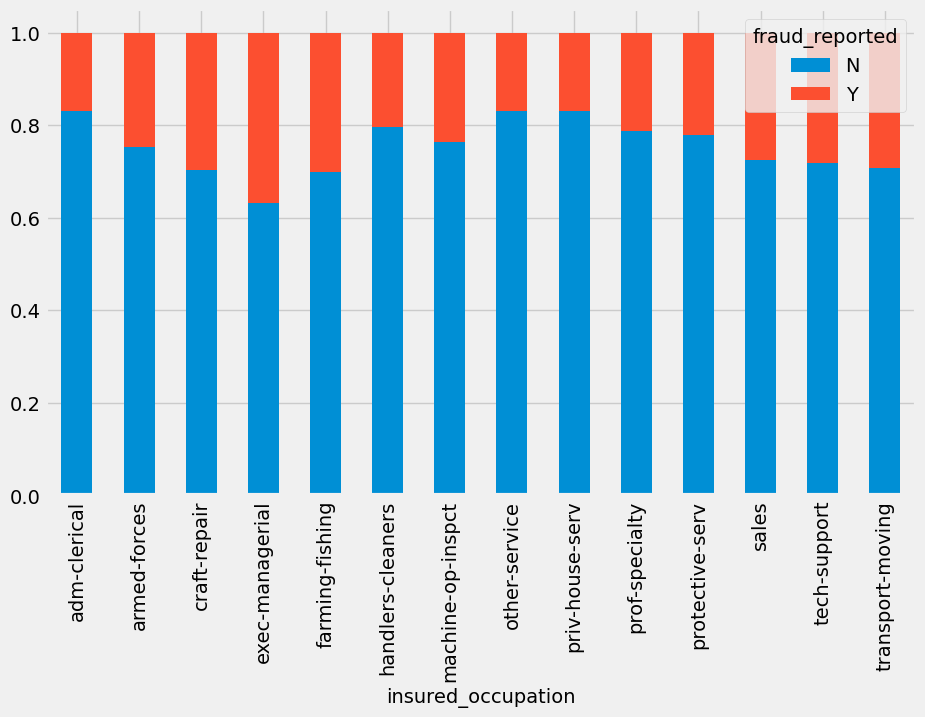

In [98]:
table=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_hobbies:

In [99]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [100]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

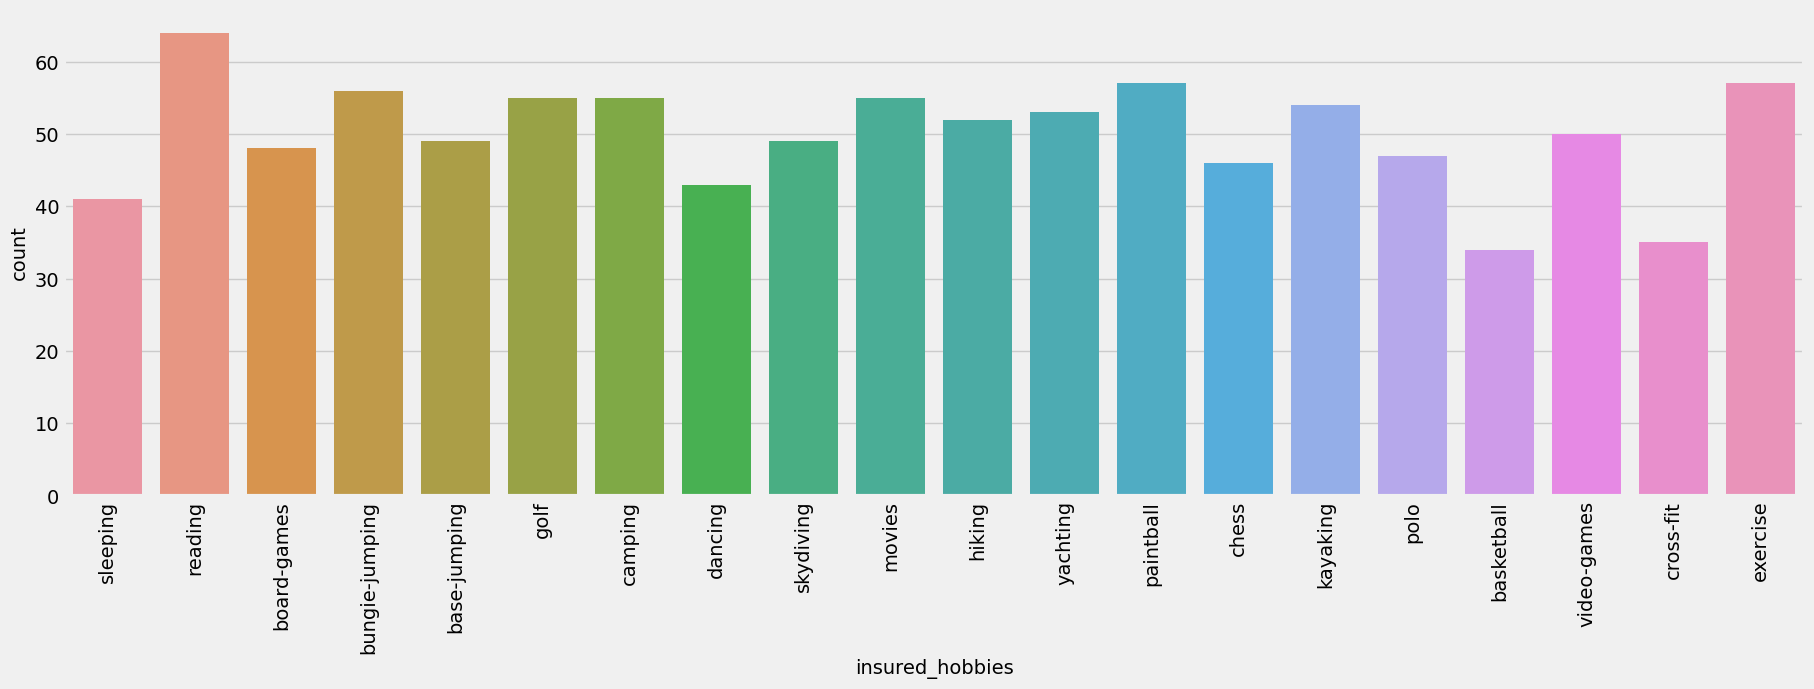

In [101]:
plt.figure(figsize=(20,6))
sns.countplot(x='insured_hobbies',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='insured_hobbies'>

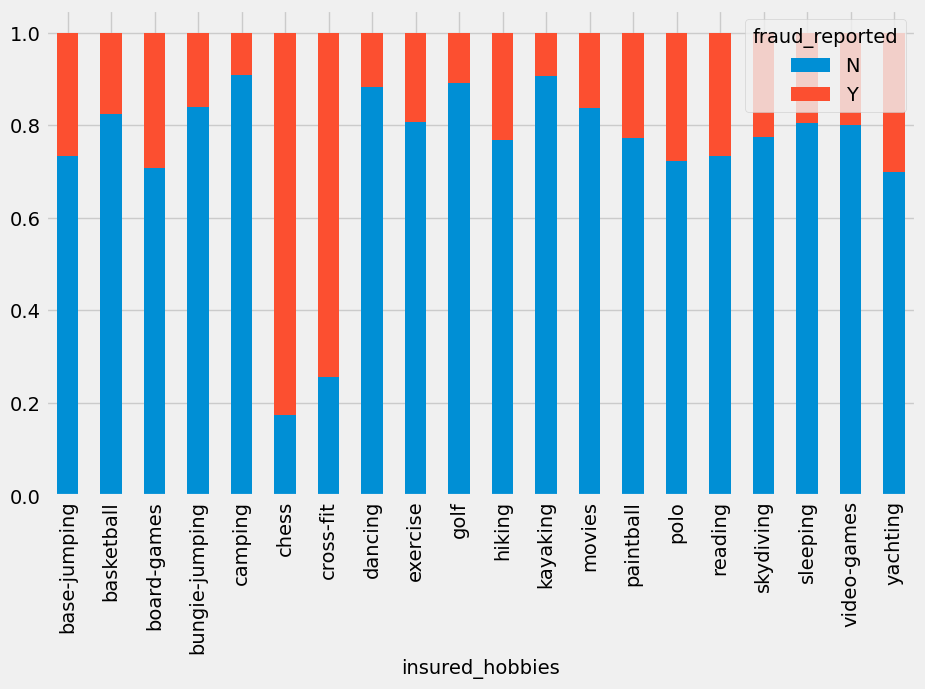

In [102]:
table=pd.crosstab(df['insured_hobbies'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [103]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# insured_relationship:

In [104]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [105]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

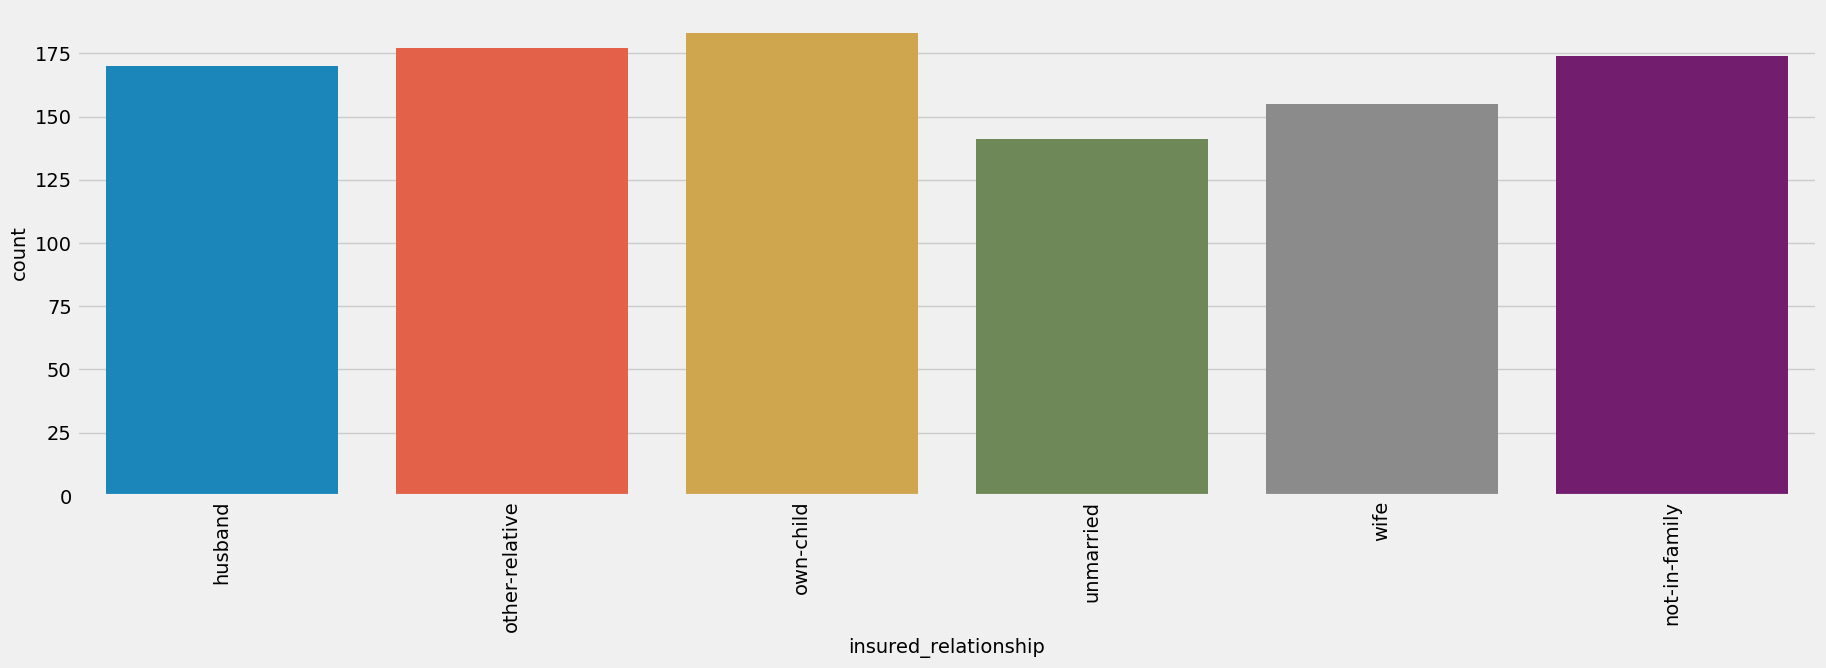

In [106]:
plt.figure(figsize=(20,6))
sns.countplot(x='insured_relationship',data=df)
plt.xticks(rotation=90)

# capital-gains:

In [107]:
df['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

In [108]:
df['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

<Axes: xlabel='capital-gains', ylabel='Density'>

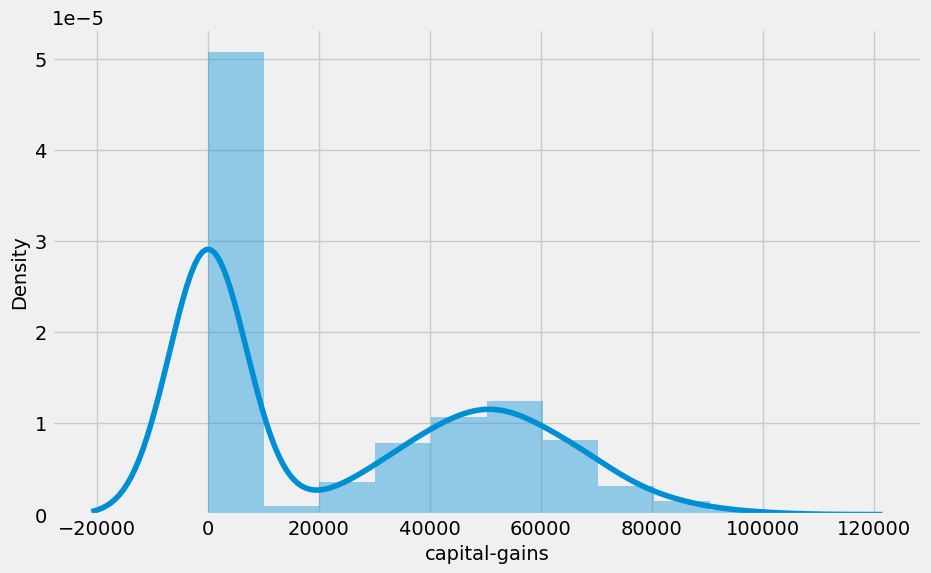

In [109]:
sns.distplot(df['capital-gains'])

In [110]:
df[cont_features]

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

# policy_deductable:

In [111]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [112]:
df['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

<Axes: xlabel='policy_deductable', ylabel='Density'>

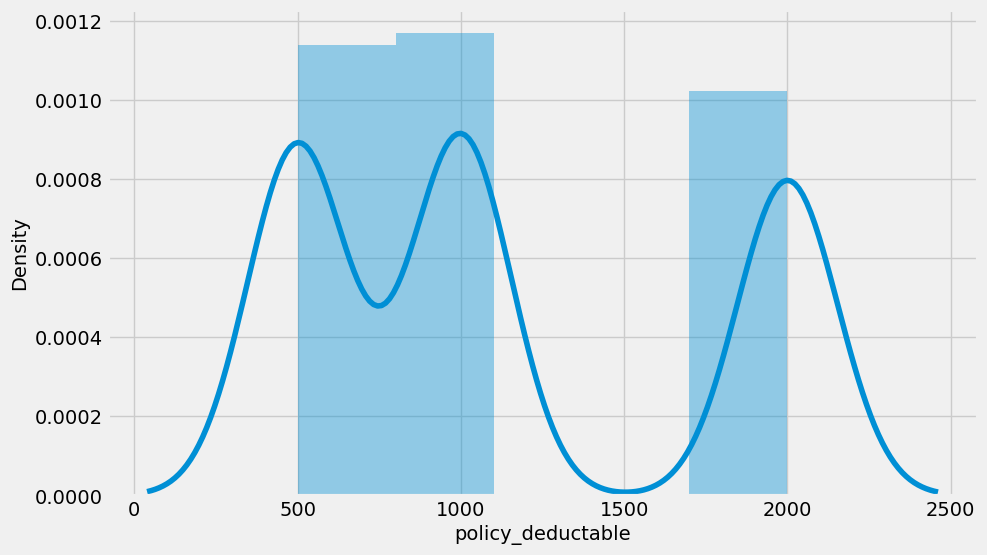

In [113]:
sns.distplot(df['policy_deductable'])

# policy_annual_premium:

In [114]:
df['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [115]:
df['policy_annual_premium'].value_counts()

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64

<Axes: xlabel='policy_annual_premium', ylabel='Density'>

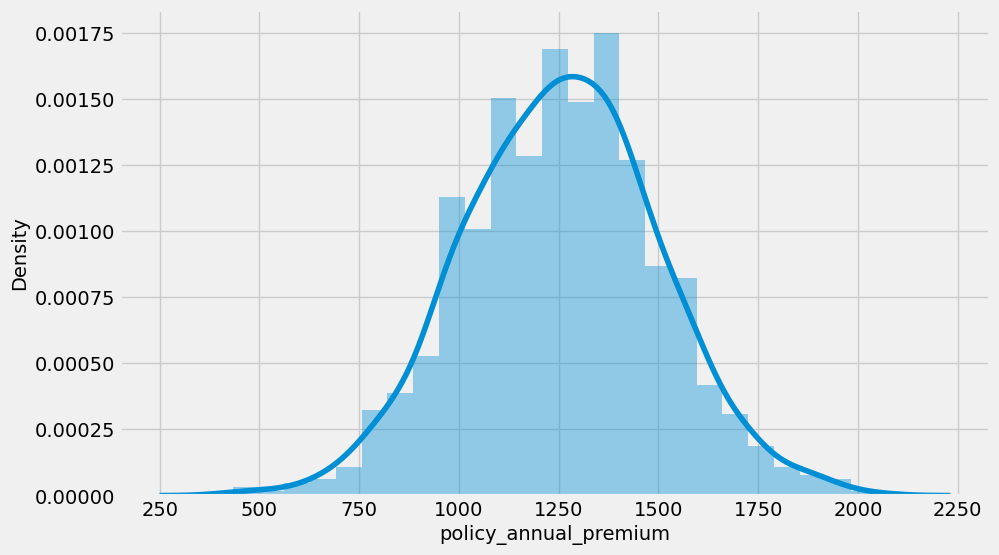

In [116]:
sns.distplot(df['policy_annual_premium'])

# umbrella_limit:

In [117]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [118]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

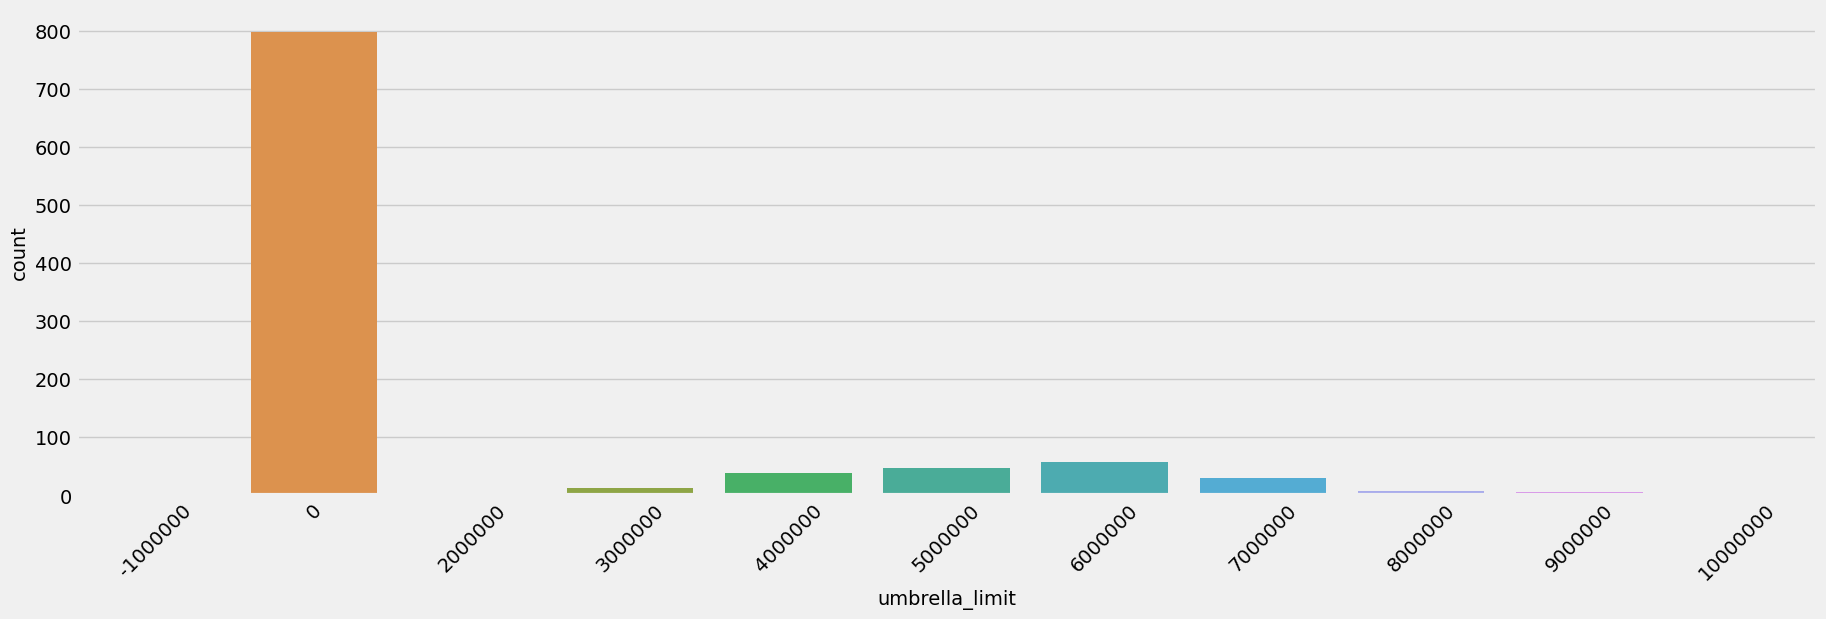

In [119]:
plt.figure(figsize=(20,6))
sns.countplot(x='umbrella_limit',data=df)
plt.xticks(rotation=45)

# insured_zip:

In [120]:
df['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [121]:
df['insured_zip'].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

<Axes: xlabel='insured_zip', ylabel='Density'>

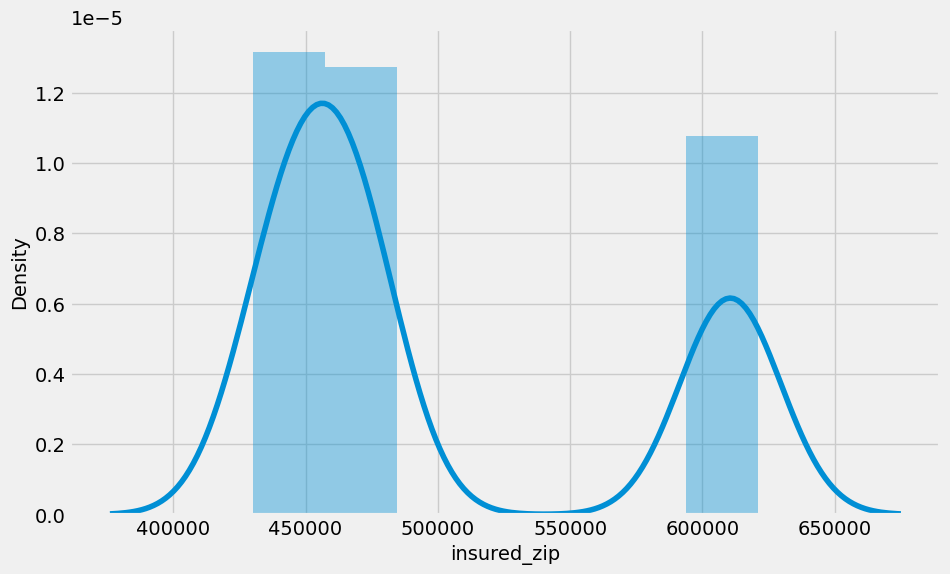

In [122]:
sns.distplot(df['insured_zip'])

# capital-gains:

In [123]:
df['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

In [124]:
df['capital-gains'].value_counts()

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

<Axes: xlabel='capital-gains', ylabel='Density'>

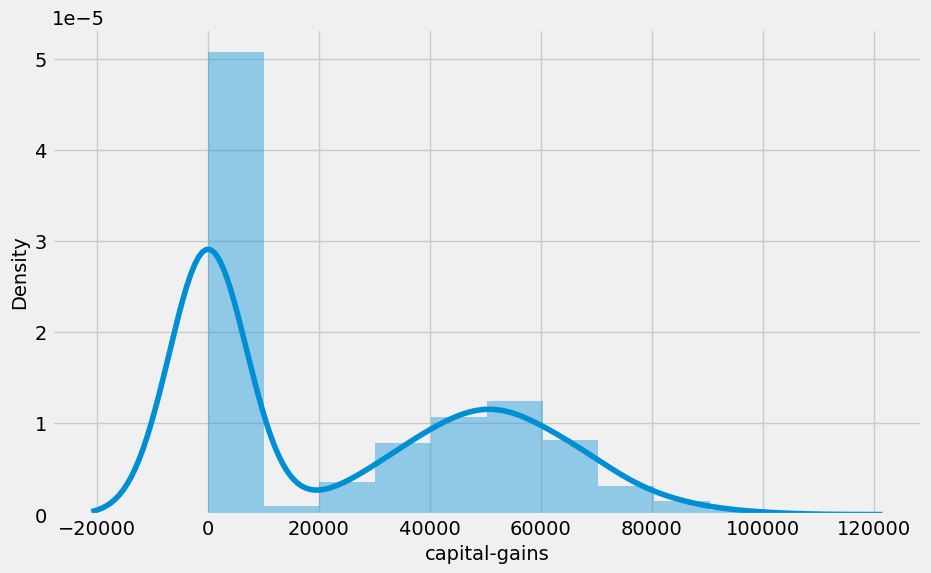

In [125]:
sns.distplot(df['capital-gains'])

# capital-loss:

In [126]:
df['capital-loss'].unique()

array([      0,  -62400,  -46000,  -77000,  -39300,  -51000,  -32800,
        -55500,  -37800,  -27300,  -68200,  -31000,  -53500,  -29200,
        -30200,  -55600,  -64000,  -49200,  -55700,  -24100,  -67400,
        -60200,  -28700,  -40300,  -46500,  -39600,  -55000,  -45800,
        -58500,  -49500,  -49000,  -91200,  -66200,  -51500,  -50000,
        -50300,  -42900,  -19700,  -45000,  -40600,  -80600,  -44200,
        -78600,  -56100,  -20800,  -58400,  -71700,  -72300,  -31700,
        -58100,  -24300,  -56400,  -57000,  -47500,  -38800,  -41000,
        -56800,  -63100,  -36200,  -53700,  -69700,  -32100,  -47300,
        -54800,  -45200,  -65600,  -20400,  -77500,  -43200,  -56200,
        -57900,  -57100,  -38200,  -44600,  -44500,  -66900,  -82400,
        -54000,  -59100,  -59300,  -31400,  -26900,  -51100,  -59900,
        -88300,  -41300,  -45100,  -58900,  -22300,  -30300,  -51300,
        -57700,  -39200,  -67900,  -57500,  -90200,  -13800,  -34400,
        -36700,  -39

In [127]:
df['capital-loss'].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

<Axes: xlabel='capital-loss', ylabel='Density'>

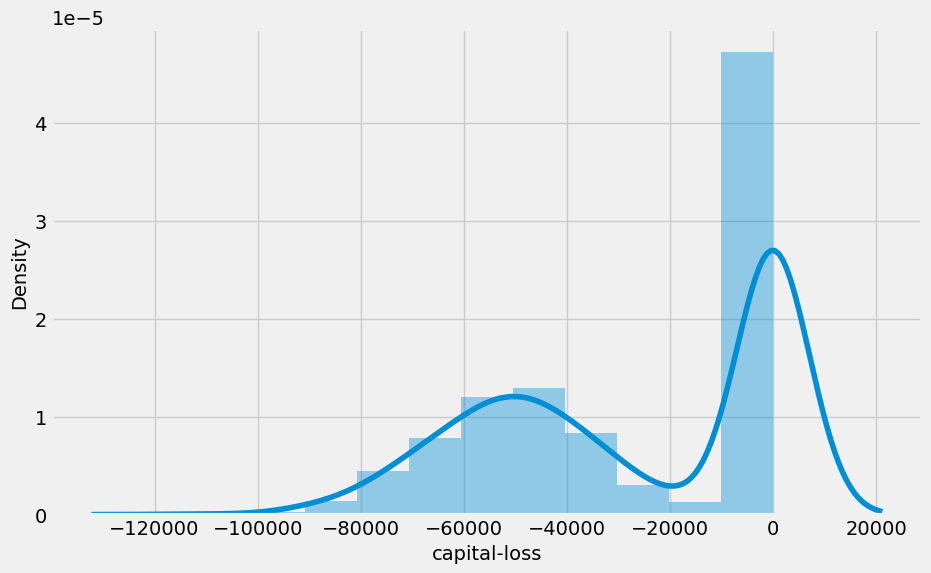

In [128]:
sns.distplot(df['capital-loss'])

In [129]:
df[cont_features]

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

Text(0.5, 0, 'AGE')

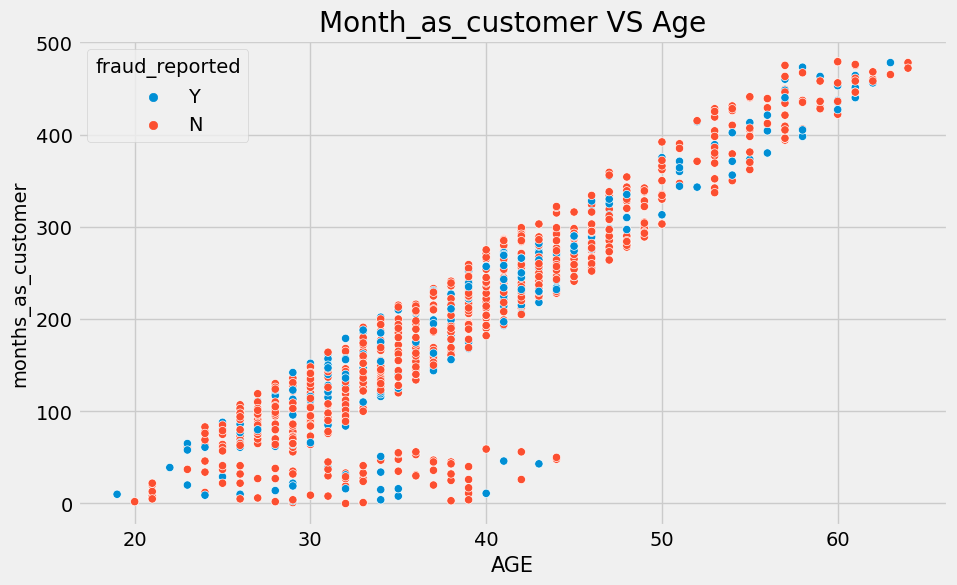

In [130]:
sns.scatterplot(x='age',y='months_as_customer',hue='fraud_reported',data=df)
plt.title('Month_as_customer VS Age')
plt.xlabel('AGE',fontsize=15)

Text(0.5, 0, 'policy_deductable')

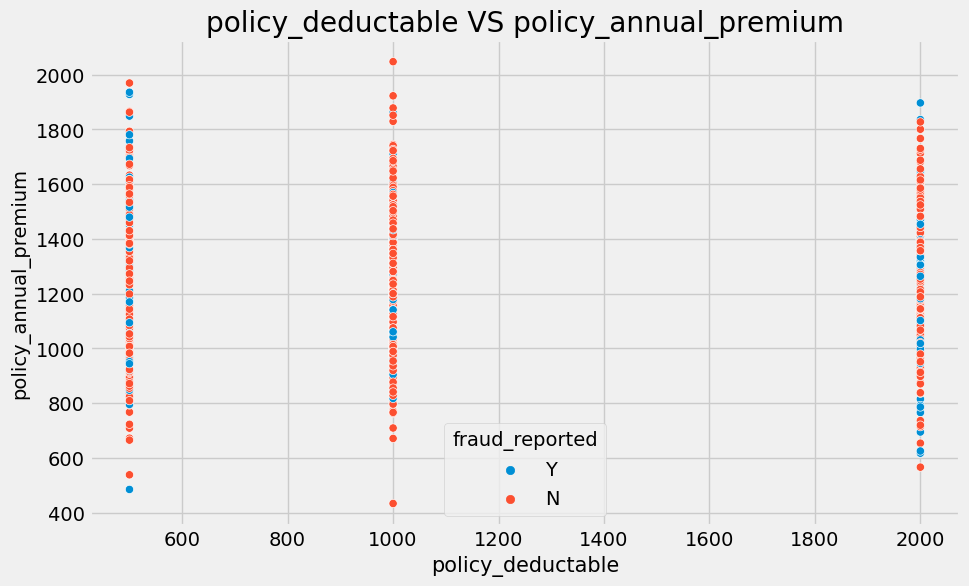

In [131]:
sns.scatterplot(x='policy_deductable',y='policy_annual_premium',hue='fraud_reported',data=df)
plt.title('policy_deductable VS policy_annual_premium')
plt.xlabel('policy_deductable',fontsize=15)

Text(0.5, 0, 'capital-loss')

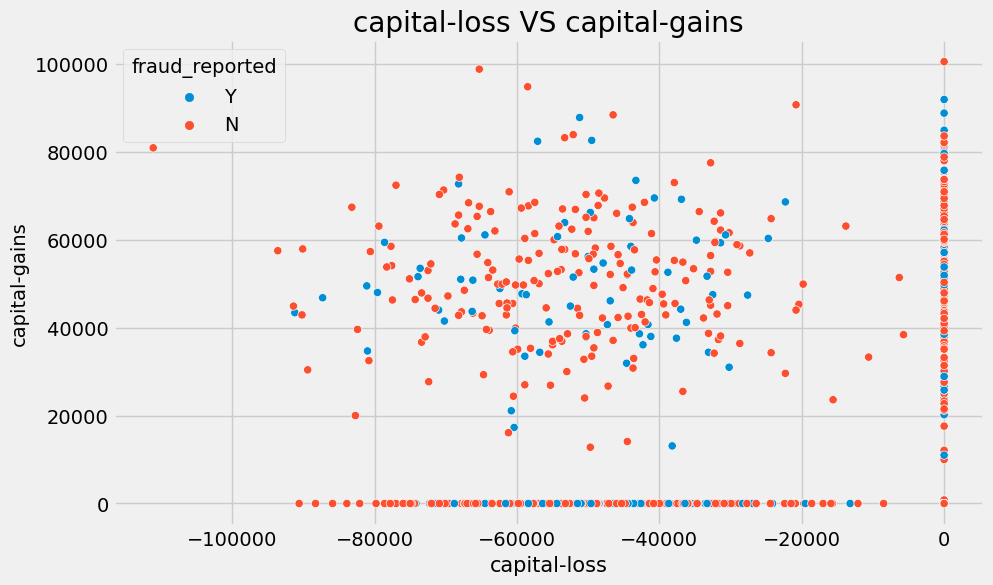

In [132]:
sns.scatterplot(x='capital-loss',y='capital-gains',hue='fraud_reported',data=df)
plt.title('capital-loss VS capital-gains')
plt.xlabel('capital-loss',fontsize=15)

<Axes: xlabel='injury_claim', ylabel='total_claim_amount'>

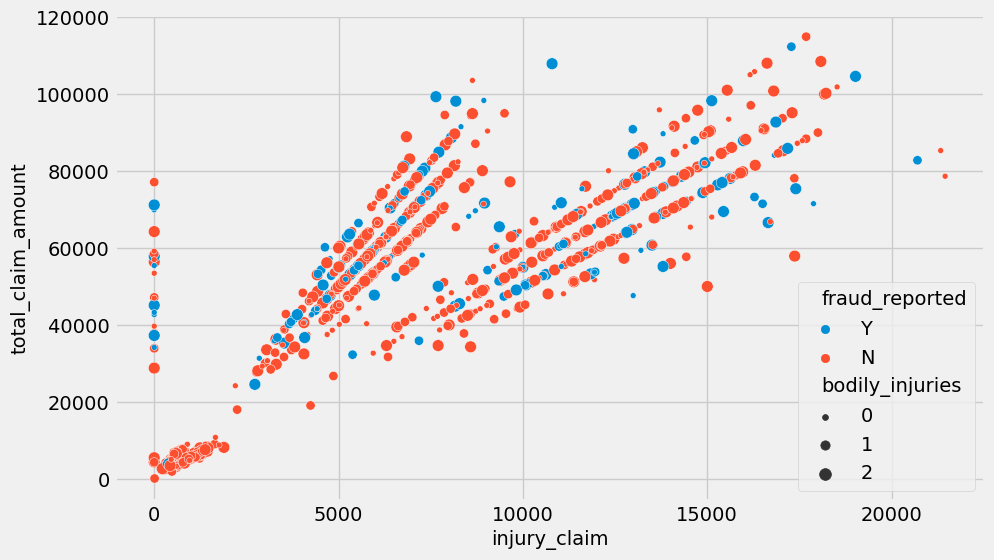

In [133]:
sns.scatterplot(x='injury_claim',y='total_claim_amount',hue='fraud_reported',size='bodily_injuries',data=df)

<Axes: xlabel='property_claim', ylabel='total_claim_amount'>

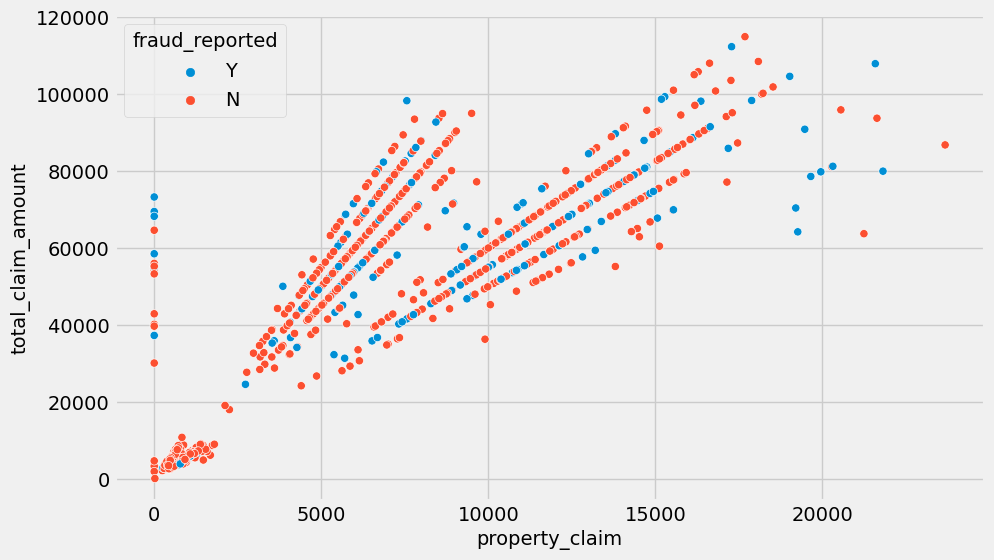

In [134]:
sns.scatterplot(x='property_claim',y='total_claim_amount',hue='fraud_reported',data=df)

In [135]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

<Axes: xlabel='vehicle_claim', ylabel='total_claim_amount'>

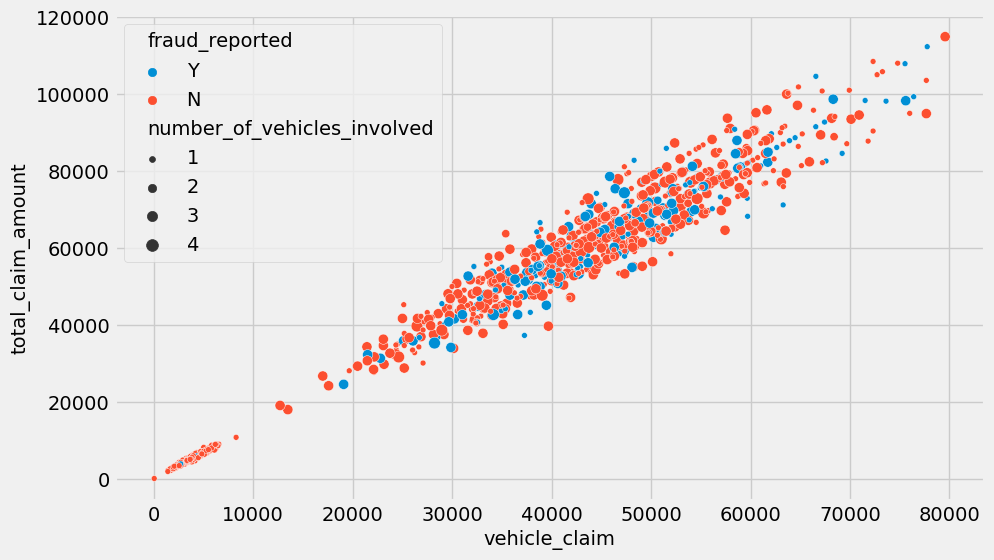

In [136]:
sns.scatterplot(x='vehicle_claim',y='total_claim_amount',hue='fraud_reported',size='number_of_vehicles_involved',data=df)

# Missing values:-

In [137]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

# Removing missing values:

In [138]:
Missing_col=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [139]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Heatmap:

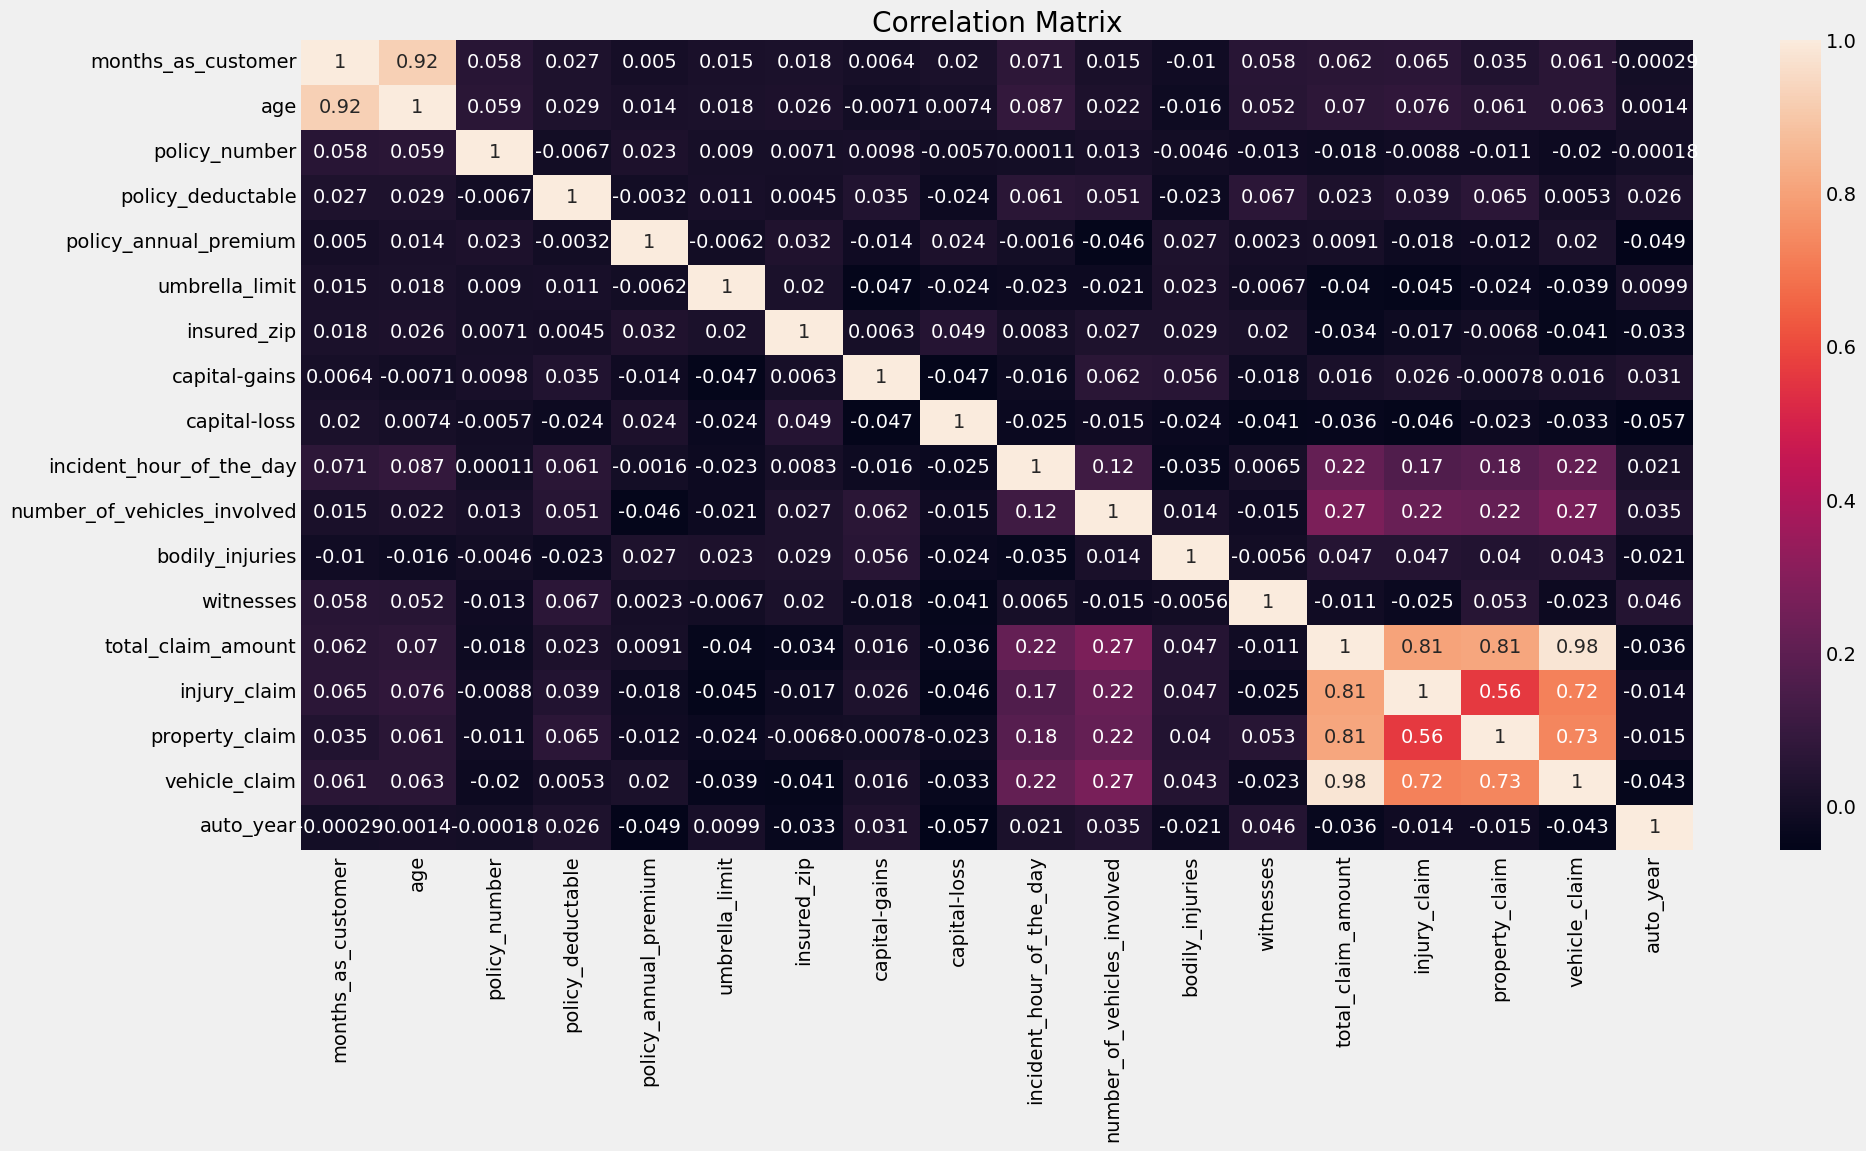

In [140]:
#Checking the correlation of all columns to each other:

plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

* Irrelevant columns:
    policy_number is not required as it no help in prediction fraud case.
    policy_blind_date is not required as we have months_as_customer, how old is policy.
    insured_zip is not required as we have policy_state and many more details for insured like sex, education, hobby and so on.

In [141]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [142]:
#Dropping Irrelevant columns:

df=df.drop(columns=['policy_number','policy_csl','insured_zip','policy_bind_date','incident_date','incident_location','auto_year'])
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies  ... bodily_injuries  witnesses  \
0       craft-repair        sleeping  ...               1          2   
1  machine-op-inspct         reading  ...               0          0   
2              sales     board-games  ...               2          3   
3       armed-forces     board-games  ...               1          2   
4              sales     board-games  ...               0          1   

   police_report_available total_claim_amount injury_claim property_claim  \
0                      YES              71610         6510          13020   
1                       NO               5070          780            780   
2                       NO              34650         7700           3850   
3                       NO              63400         6340           6340   
4                       NO               6500         1300            650   

  vehicle_claim  auto_make auto_model  fraud_reported  
0         52080       Saab        92x               Y  
1          3510   Mercedes       E400               Y  
2         23100      Dodge        RAM               N  
3         50720  Chevrolet      Tahoe               Y  
4          4550     Accura        RSX               N  

[5 rows x 32 columns]

# Histogram:

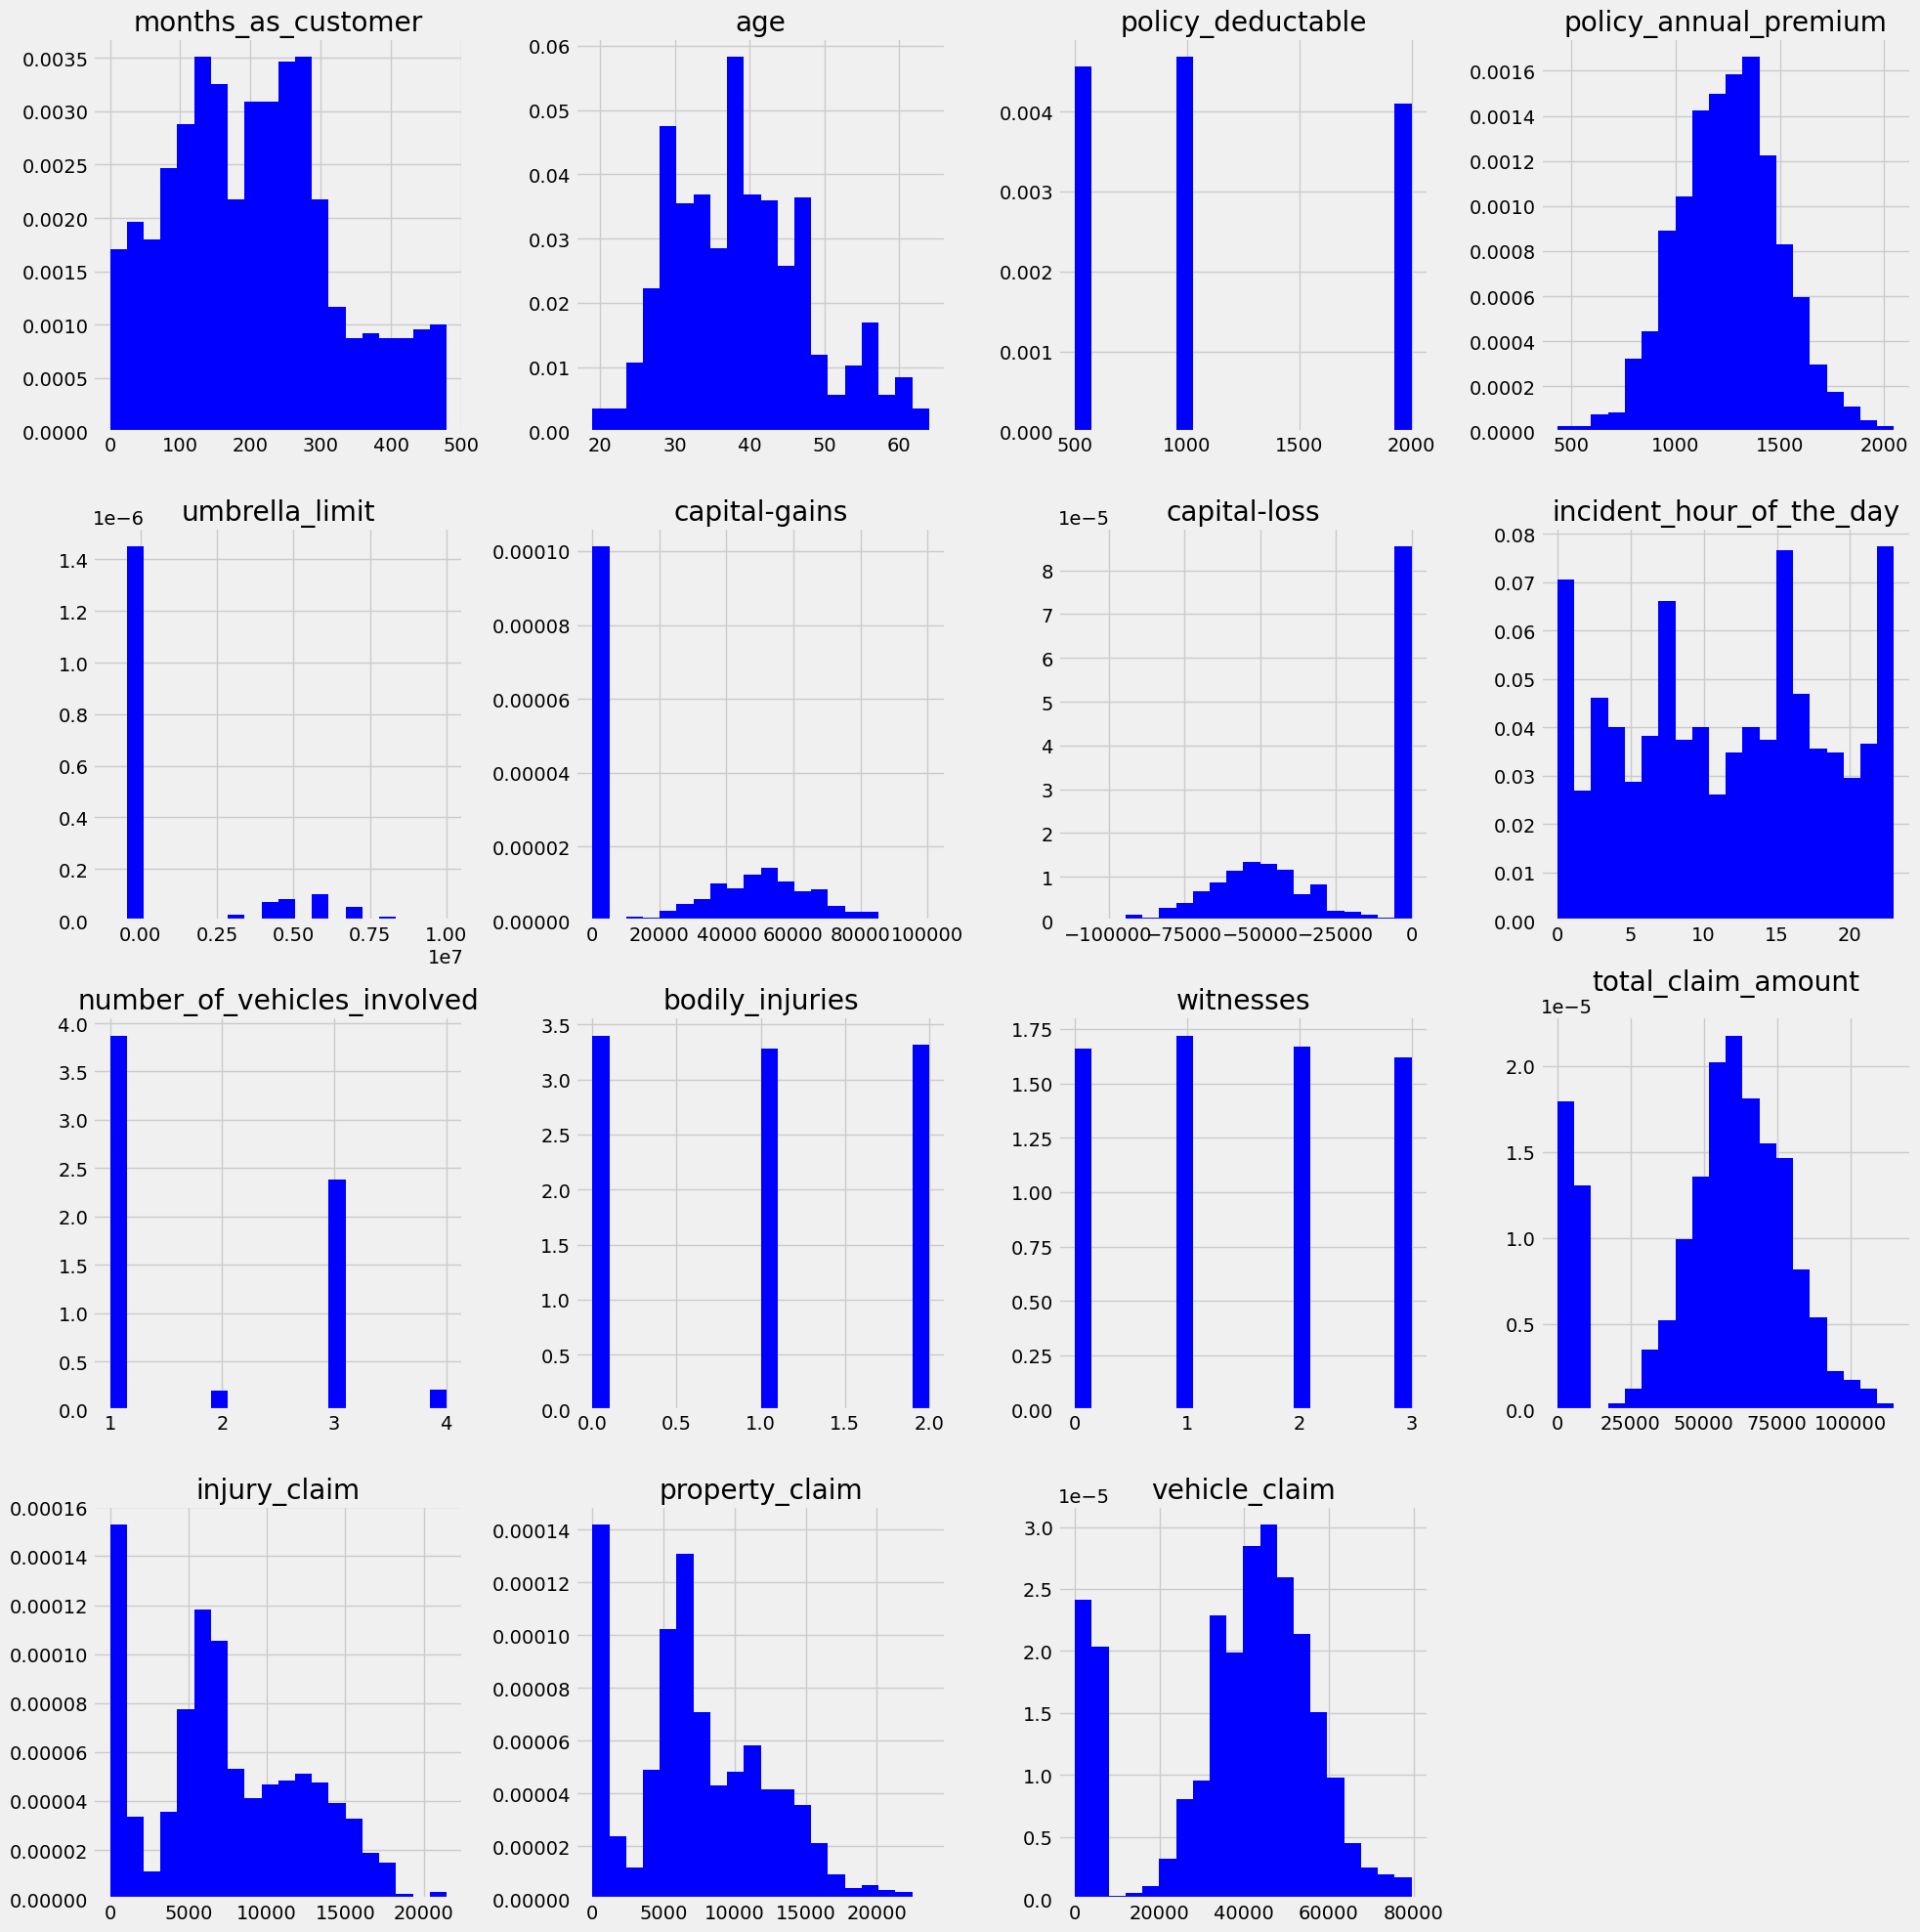

In [143]:
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# Pairplot:

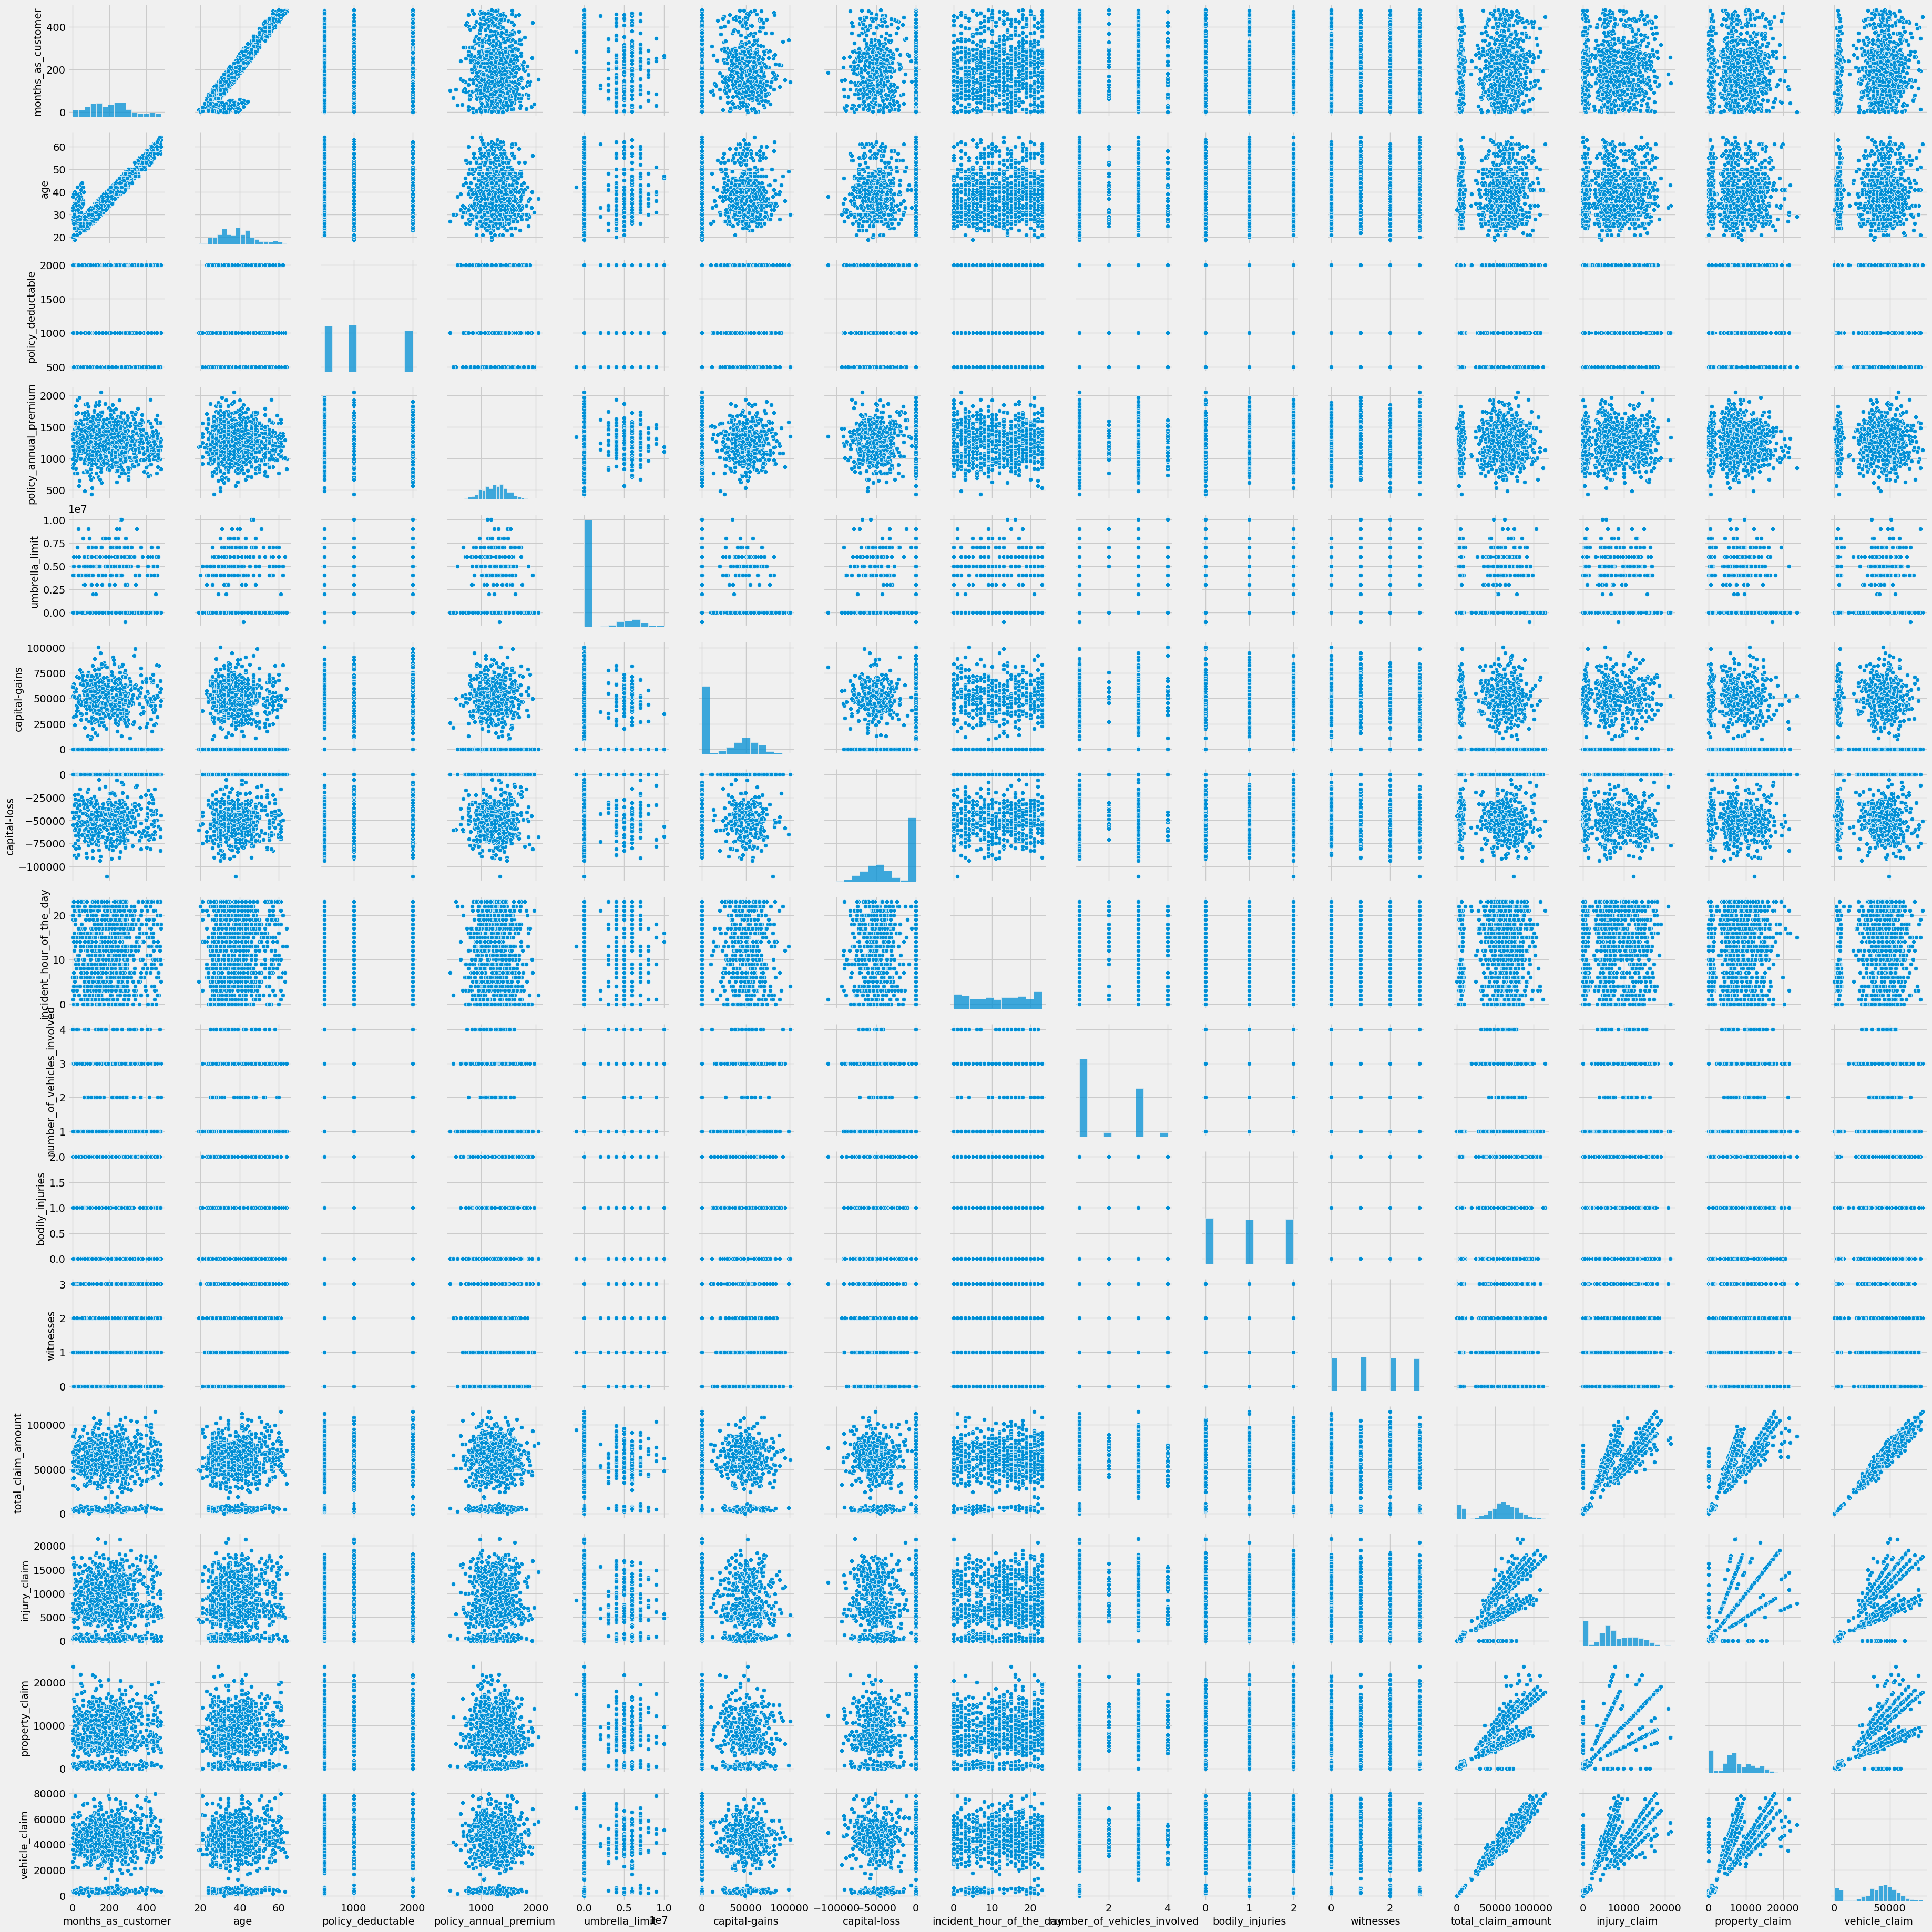

In [144]:
#Using the PairPlot:

sns.pairplot(df)
plt.show()

# Catagorical Data Handling:-

In [145]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

In [146]:
for column in df.columns:
    print(column,df[column].nunique())

months_as_customer 391
age 46
policy_state 3
policy_deductable 3
policy_annual_premium 991
umbrella_limit 11
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
capital-gains 338
capital-loss 354
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_hour_of_the_day 24
number_of_vehicles_involved 4
property_damage 2
bodily_injuries 3
witnesses 4
police_report_available 2
total_claim_amount 763
injury_claim 638
property_claim 626
vehicle_claim 726
auto_make 14
auto_model 39
fraud_reported 2


# Apply label encoder:-

In [147]:
#converting data to numerical type using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df.insured_sex.drop_duplicates())
df.insured_sex= label.transform(df.insured_sex)

label.fit(df.property_damage.drop_duplicates())
df.property_damage= label.transform(df.property_damage)

label.fit(df.police_report_available.drop_duplicates())
df.police_report_available= label.transform(df.police_report_available)

label.fit(df.fraud_reported.drop_duplicates())
df.fraud_reported= label.transform(df.fraud_reported)

df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

# Apply ordinal encoder:-

In [148]:
from sklearn.preprocessing import OrdinalEncoder

In [149]:
enc=OrdinalEncoder()
df['policy_state']=enc.fit_transform(df[['policy_state']])
df['insured_education_level']=enc.fit_transform(df[['insured_education_level']])
df['insured_occupation']=enc.fit_transform(df[['insured_occupation']])
df['insured_hobbies']=enc.fit_transform(df[['insured_hobbies']])
df['insured_relationship']=enc.fit_transform(df[['insured_relationship']])
df['incident_type']=enc.fit_transform(df[['incident_type']])
df['collision_type']=enc.fit_transform(df[['collision_type']])
df['incident_severity']=enc.fit_transform(df[['incident_severity']])
df['authorities_contacted']=enc.fit_transform(df[['authorities_contacted']])
df['incident_state']=enc.fit_transform(df[['incident_state']])
df['incident_city']=enc.fit_transform(df[['incident_city']])
df['auto_make']=enc.fit_transform(df[['auto_make']])
df['auto_model']=enc.fit_transform(df[['auto_model']])

df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

# Checking Outliers:

months_as_customer                 Axes(0.08,0.07;0.0227749x0.81)
age                             Axes(0.10733,0.07;0.0227749x0.81)
policy_state                    Axes(0.13466,0.07;0.0227749x0.81)
policy_deductable               Axes(0.16199,0.07;0.0227749x0.81)
policy_annual_premium          Axes(0.189319,0.07;0.0227749x0.81)
umbrella_limit                 Axes(0.216649,0.07;0.0227749x0.81)
insured_sex                    Axes(0.243979,0.07;0.0227749x0.81)
insured_education_level        Axes(0.271309,0.07;0.0227749x0.81)
insured_occupation             Axes(0.298639,0.07;0.0227749x0.81)
insured_hobbies                Axes(0.325969,0.07;0.0227749x0.81)
insured_relationship           Axes(0.353298,0.07;0.0227749x0.81)
capital-gains                  Axes(0.380628,0.07;0.0227749x0.81)
capital-loss                   Axes(0.407958,0.07;0.0227749x0.81)
incident_type                  Axes(0.435288,0.07;0.0227749x0.81)
collision_type                 Axes(0.462618,0.07;0.0227749x0.81)
incident_s

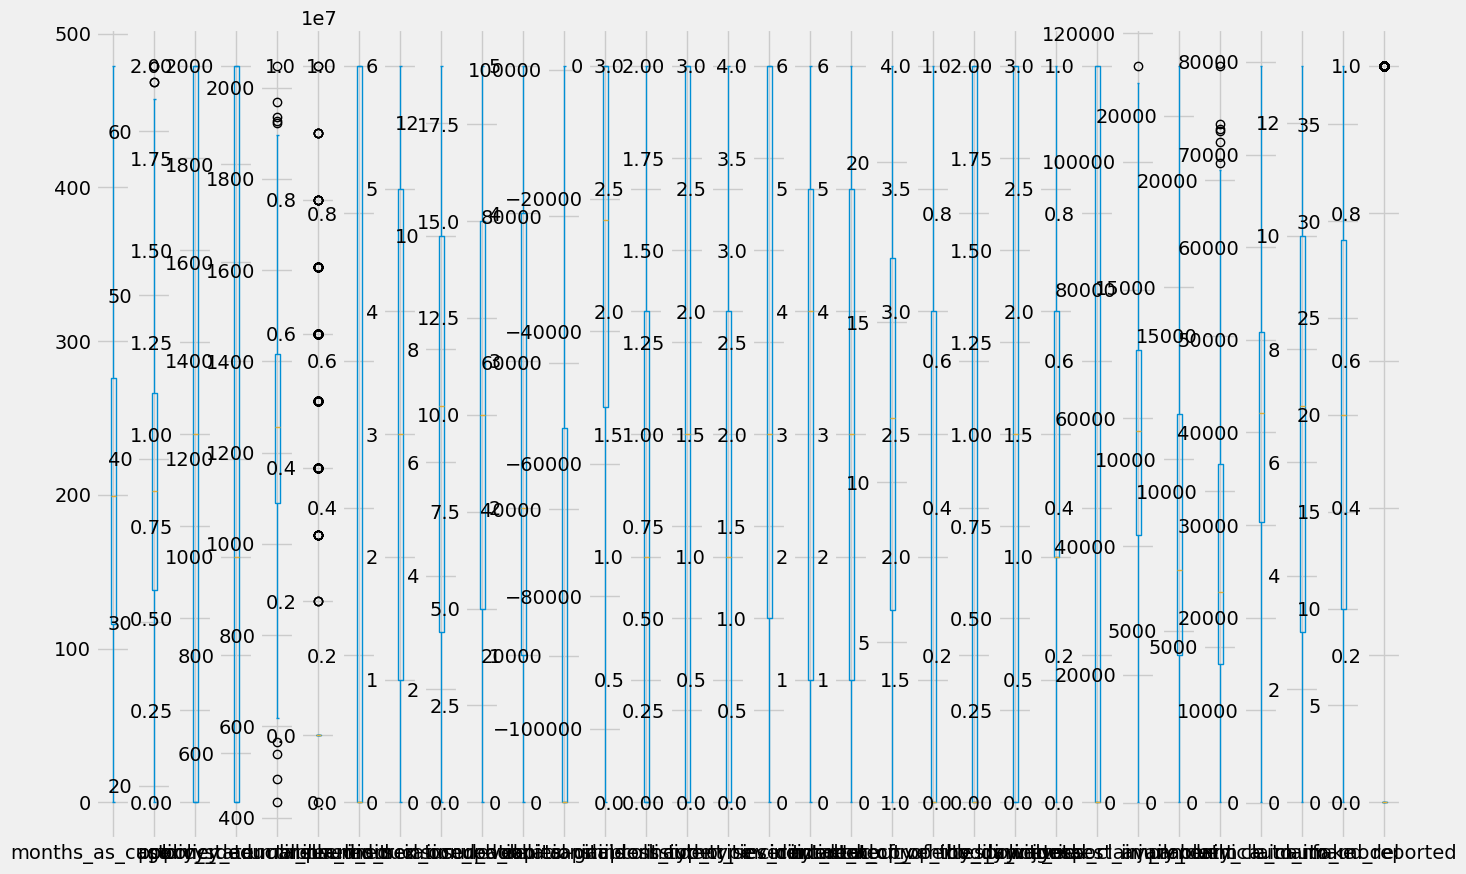

In [150]:
#Plotting the boxplot of each column to check the outliers:

df.plot(kind='box',subplots=True,figsize=(15,10))

# Removing Outliers:

In [151]:
import scipy.stats as stats
from scipy.stats import zscore

In [152]:
#z score method:

z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48           2.0               1000   
1                   228   42           1.0               2000   
2                   134   29           2.0               2000   
3                   256   41           0.0               2000   
4                   228   44           0.0               1000   
..                  ...  ...           ...                ...   
995                   3   38           2.0               1000   
996                 285   41           0.0               1000   
997                 130   34           2.0                500   
998                 458   62           0.0               2000   
999                 456   60           2.0               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4.0                 2.0             17.0  ...   
1                        4.0                 6.0             15.0  ...   
2                        6.0                11.0              2.0  ...   
3                        6.0                 1.0              2.0  ...   
4                        0.0                11.0              2.0  ...   
..                       ...                 ...              ...  ...   
995                      5.0                 2.0             13.0  ...   
996                      6.0                 9.0             17.0  ...   
997                      5.0                 1.0              3.0  ...   
998                      0.0                 5.0              0.0  ...   
999                      0.0                11.0             11.0  ...   

     bodily_injuries  witnesses  police_report_available  total_claim_amount  \
0                  1          2                        1               71610   
1                  0          0                        0                5070   
2                  2          3                        0               34650   
3                  1          2                        0               63400   
4                  0          1                        0                6500   
..               ...        ...                      ...                 ...   
995                0          1                        0               87200   
996                2          3                        0              108480   
997                2          3                        1               67500   
998                0          1                        1               46980   
999                0          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080       10.0         1.0   
1             780             780           3510        8.0        12.0   
2            7700            3850          23100        4.0        30.0   
3            6340            6340          50720        3.0        34.0   
4            1300             650           4550        0.0        31.0   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040        6.0         6.0   
996         18080           18080          72320       13.0      

In [153]:
#Checking shape of new dataset:
df_new.shape

(980, 32)

In [154]:
#Checking shape of old dataset:
df.shape

(1000, 32)

# Checking for skewness:

In [155]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


# Skewness Handling:

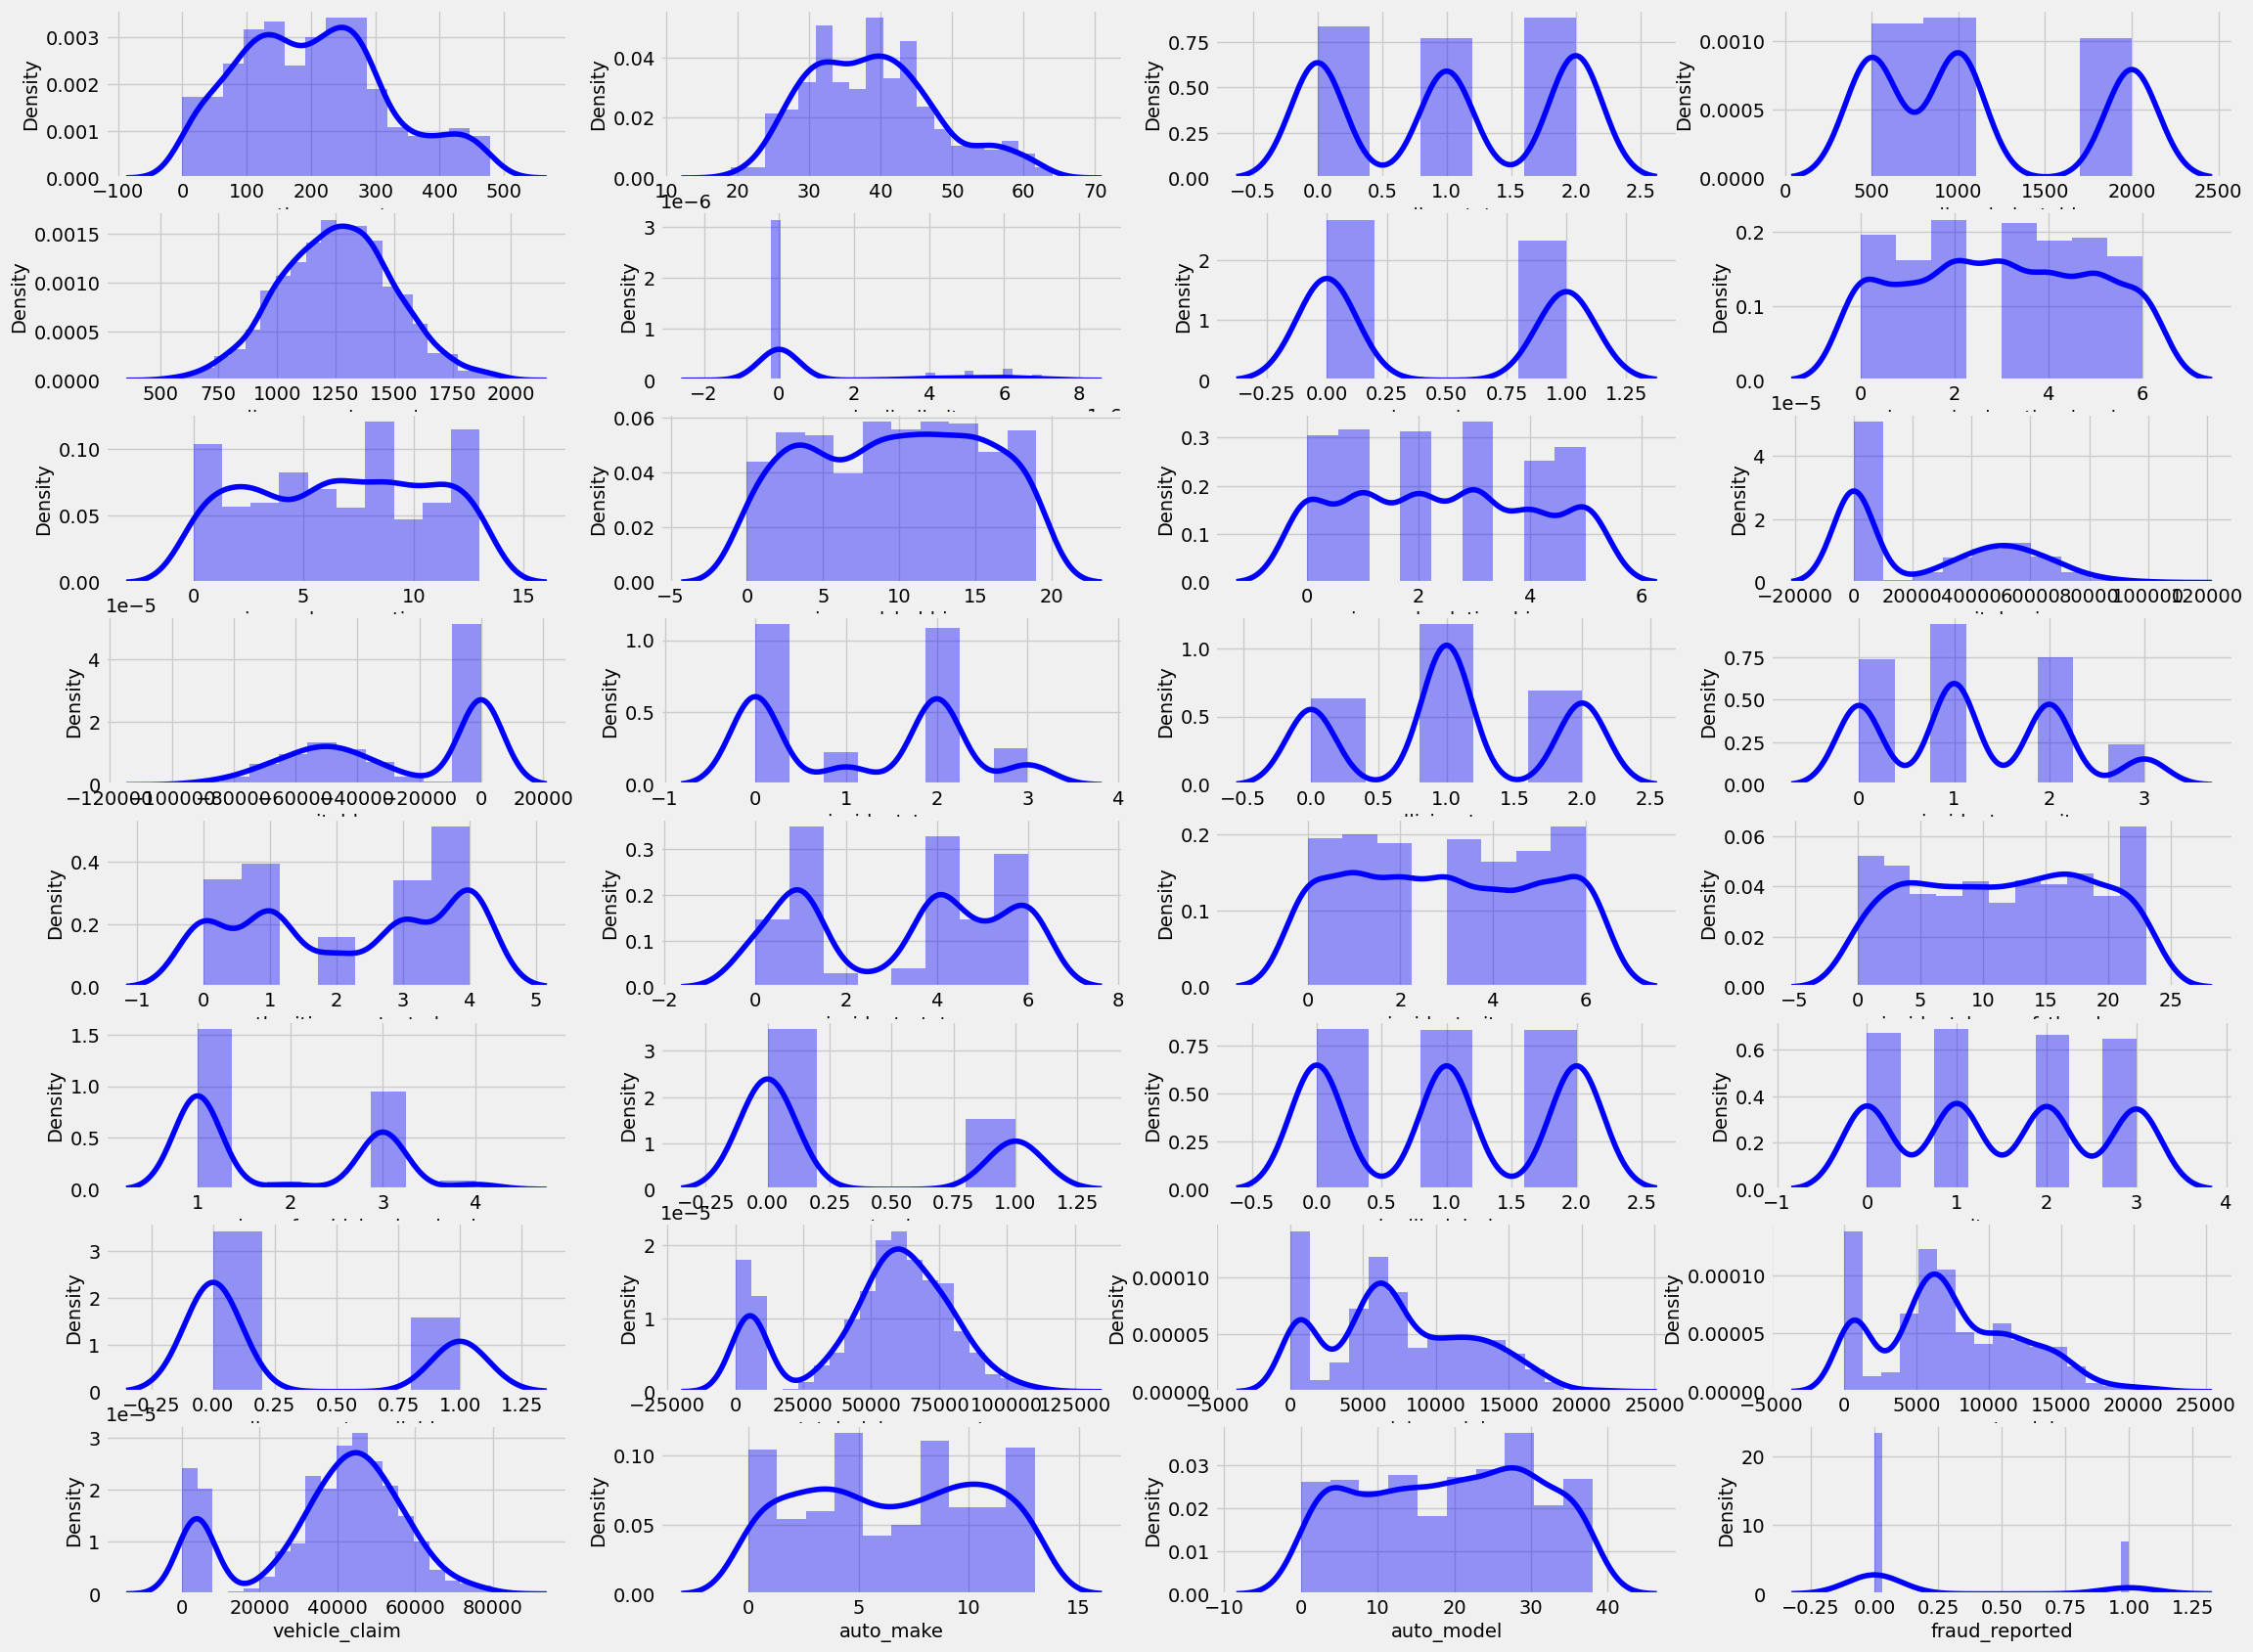

In [156]:
plt.figure(figsize=(25,20))
for i in enumerate(df_new.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_new[i[1]],color='b')

* Skewness more than +/-0.5 will be treated.

In [157]:
#Removing skewness of the data:

from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_new.columns:
    if abs(df_new.loc[:,i].skew())>0.5:
        df_new.loc[:,i]=PT.fit_transform(df_new.loc[:,i].values.reshape(-1,1))

In [158]:
df_new.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                -7.932397
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.372833
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

In [159]:
x=df_new.drop('fraud_reported',axis=1) #List of all feature
y=df_new['fraud_reported'] #Label

print(x.shape)
print(y.shape)

(980, 31)
(980,)


In [160]:
x.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48           2.0               1000   
1                 228   42           1.0               2000   
2                 134   29           2.0               2000   
3                 256   41           0.0               2000   
4                 228   44           0.0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91       -0.337086            1   
1                1197.22        1.482455            1   
2                1413.14        1.482455            0   
3                1415.74        1.788485            0   
4                1583.91        1.788485            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                      4.0                 2.0             17.0  ...   
1                      4.0                 6.0             15.0  ...   
2                      6.0                11.0              2.0  ...   
3                      6.0                 1.0              2.0  ...   
4                      0.0                11.0              2.0  ...   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0         1.512809                1          2                 1.473608   
1        -0.661022                0          0                -0.678606   
2        -0.661022                2          3                -0.678606   
3        -0.661022                1          2                -0.678606   
4        -0.661022                0          1                -0.678606   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0            0.720163          6510           13020       0.758130       10.0   
1           -1.778146           780             780      -1.787485        8.0   
2           -0.715924          7700            3850      -0.820246        4.0   
3            0.395030          6340            6340       0.681832        3.0   
4           -1.730904          1300             650      -1.740862        0.0   

   auto_model  
0         1.0  
1        12.0  
2        30.0  
3        34.0  
4        31.0  

[5 rows x 31 columns]

In [161]:
y.head()

0    1.755942
1    1.755942
2   -0.569495
3    1.755942
4   -0.569495
Name: fraud_reported, dtype: float64

# Transformed y values:

In [162]:
from sklearn import preprocessing
from sklearn import utils

In [163]:
#convert y values to categorical values:
lab=preprocessing.LabelEncoder()
y = lab.fit_transform(y)

In [164]:
#view transformed values:
print(y)

[1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 

# Feature Scaling:-

In [165]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

months_as_customer       age  policy_state  policy_deductable  \
0              1.069568  0.983352      1.179821          -0.224643   
1              0.202726  0.329711     -0.024580           1.412161   
2             -0.612105 -1.086511      1.179821           1.412161   
3              0.445442  0.220771     -1.228980           1.412161   
4              0.202726  0.547591     -1.228980          -0.224643   
..                  ...       ...           ...                ...   
975           -1.747669 -0.106050      1.179821          -0.224643   
976            0.696826  0.220771     -1.228980          -0.224643   
977           -0.646779 -0.541810      1.179821          -1.043045   
978            2.196463  2.508513     -1.228980           1.412161   
979            2.179126  2.290633      1.179821          -0.224643   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                 0.620031       -0.337086     1.071971   
1                -0.248448        1.482455     1.071971   
2                 0.645834        1.482455    -0.932861   
3                 0.656603        1.788485    -0.932861   
4                 1.353117        1.788485     1.071971   
..                     ...             ...          ...   
975               0.221970       -0.337086    -0.932861   
976               0.743786       -0.337086    -0.932861   
977               0.523032        0.839984    -0.932861   
978               0.412986        1.482455     1.071971   
979              -2.033657       -0.337086    -0.932861   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                   0.532901           -1.156087         1.275279  ...   
1                   0.532901           -0.160292         0.923775  ...   
2                   1.556905            1.084451        -1.361003  ...   
3                   1.556905           -1.405036        -1.361003  ...   
4                  -1.515109            1.084451        -1.361003  ...   
..                       ...                 ...              ...  ...   
975                 1.044903           -1.156087         0.572270  ...   
976                 1.556905            0.586554         1.275279  ...   
977                 1.044903           -1.405036        -1.185251  ...   
978                -1.515109           -0.409241        -1.712507  ...   
979                -1.515109            1.084451         0.220766  ...   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0           1.512809         0.002498   0.466378                 1.473608   
1          -0.661022        -1.221626  -1.333033                -0.678606   
2          -0.661022         1.226623   1.366083                -0.678606   
3          -0.661022         0.002498   0.466378                -0.678606   
4          -0.661022        -1.221626  -0.433327                -0.678606   
..               ...              ...        ...                      ...   
975         1.512809        -1.221626  -0.433327                -0.678606   
976         1.512809         1.226623   1.366083                -0.678606   
977        -0.661022         1.226623   1.366083                 1.473608   
978        -0.661022        -1.221626  -0.433327                 1.473608   
979        -0.661022        -1.221626   1.366083                -0.678606   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0              0.720163     -0.187627        1.176015       0.758130   
1             -1.778146     -1.361005       -1.378984      -1.787485   
2             -0.715924      0.056059       -0.738147      -0.820246   
3              0.395030     -0.222439       -0.218380       0.681832   
4             -1.730904     -1.254521       -1.406121      -1.740862   
..                  ...           ...             ...            ...   
975            1.344950      2.050597        0.278425       1.265008   
976            2.210977      2.181655        2.232248       1.912

# Multicollinearity using Variance_inflation_factor:-

In [166]:
import statsmodels

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [168]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

vif                     Features
0       6.889806           months_as_customer
1       6.906111                          age
2       1.029289                 policy_state
3       1.042479            policy_deductable
4       1.031606        policy_annual_premium
5       1.034037               umbrella_limit
6       1.024212                  insured_sex
7       1.037377      insured_education_level
8       1.014798           insured_occupation
9       1.049055              insured_hobbies
10      1.039150         insured_relationship
11      1.031346                capital-gains
12      1.034430                 capital-loss
13      6.317855                incident_type
14      1.040778               collision_type
15      1.232857            incident_severity
16      1.092146        authorities_contacted
17      1.044451               incident_state
18      1.022532                incident_city
19      1.095605     incident_hour_of_the_day
20      6.356785  number_of_vehicles_involved
21      1.036914              property_damage
22      1.025074              bodily_injuries
23      1.032275                    witnesses
24      1.037273      police_report_available
25  43270.106393           total_claim_amount
26   1604.555253                 injury_claim
27   1548.737231               property_claim
28  21521.828354                vehicle_claim
29      1.077459                    auto_make
30      1.066479                   auto_model

# Remove Multicollinearity:

In [169]:
X = X.drop(['total_claim_amount'],axis=1)

In [170]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

vif                     Features
0   6.887020           months_as_customer
1   6.906099                          age
2   1.029217                 policy_state
3   1.040736            policy_deductable
4   1.030857        policy_annual_premium
5   1.032159               umbrella_limit
6   1.021446                  insured_sex
7   1.037360      insured_education_level
8   1.013980           insured_occupation
9   1.047065              insured_hobbies
10  1.039148         insured_relationship
11  1.031273                capital-gains
12  1.034012                 capital-loss
13  6.315063                incident_type
14  1.040590               collision_type
15  1.188935            incident_severity
16  1.070411        authorities_contacted
17  1.039985               incident_state
18  1.020802                incident_city
19  1.089658     incident_hour_of_the_day
20  6.332750  number_of_vehicles_involved
21  1.036855              property_damage
22  1.022722              bodily_injuries
23  1.032211                    witnesses
24  1.035845      police_report_available
25  2.156740                 injury_claim
26  2.242373               property_claim
27  3.300735                vehicle_claim
28  1.074002                    auto_make
29  1.065445                   auto_model

# Balancing the target column using SMOTE:-

In [171]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print('unbalanced data: ',Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print('balanced data: ',Counter(y_sm))

unbalanced data:  Counter({0: 740, 1: 240})
balanced data:  Counter({1: 740, 0: 740})


# Machine Learning model building for Target Variable:

In [172]:
#import libraries:-
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [173]:
#Creating the data sets:

X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.30,random_state=42,shuffle=True)

In [174]:
X_train.shape

(1036, 30)

In [175]:
y_train.shape

(1036,)

In [176]:
X_test.shape

(444, 30)

In [177]:
y_test.shape

(444,)

# Logistic Regression:-

In [178]:
LR= LogisticRegression()

#training the model:-
LR.fit(X_train,y_train)
pred=LR.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(LR,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result) 

Accuracy_score: 0.7454954954954955
Confusion matrix:
 [[150  63]
 [ 50 181]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       213
           1       0.74      0.78      0.76       231

    accuracy                           0.75       444
   macro avg       0.75      0.74      0.74       444
weighted avg       0.75      0.75      0.74       444

Cross Validation Score: 0.776530612244898

 Accuracy Score - cross validation score is -0.031035116749402514


# Decision Tree Classifier:-

In [179]:
DTC= DecisionTreeClassifier()

#training the model:-
DTC.fit(X_train,y_train)
pred=DTC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(DTC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8423423423423423
Confusion matrix:
 [[167  46]
 [ 24 207]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.83       213
           1       0.82      0.90      0.86       231

    accuracy                           0.84       444
   macro avg       0.85      0.84      0.84       444
weighted avg       0.85      0.84      0.84       444

Cross Validation Score: 0.7653061224489796

 Accuracy Score - cross validation score is 0.07703621989336273


# Random forest classifier:-

In [180]:
RFC= RandomForestClassifier()

#training the model:-
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(RFC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result) 

Accuracy_score: 0.8716216216216216
Confusion matrix:
 [[182  31]
 [ 26 205]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       213
           1       0.87      0.89      0.88       231

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

Cross Validation Score: 0.7591836734693878

 Accuracy Score - cross validation score is 0.11243794815223385


# SVC using linear kernel:-

In [181]:
Linear= SVC(kernel='linear')

#training the model:-
Linear.fit(X_train,y_train)
pred=Linear.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(Linear,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7545045045045045
Confusion matrix:
 [[151  62]
 [ 47 184]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       213
           1       0.75      0.80      0.77       231

    accuracy                           0.75       444
   macro avg       0.76      0.75      0.75       444
weighted avg       0.75      0.75      0.75       444

Cross Validation Score: 0.7724489795918366

 Accuracy Score - cross validation score is -0.0179444750873321


# SVC using poly kernel:-

In [182]:
Poly= SVC(kernel='poly')

#training the model:-
Poly.fit(X_train,y_train)
pred=Poly.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(Poly,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8243243243243243
Confusion matrix:
 [[157  56]
 [ 22 209]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80       213
           1       0.79      0.90      0.84       231

    accuracy                           0.82       444
   macro avg       0.83      0.82      0.82       444
weighted avg       0.83      0.82      0.82       444

Cross Validation Score: 0.753061224489796

 Accuracy Score - cross validation score is 0.07126309983452839


# SVC using rbf kernel:-

In [183]:
RBF= SVC(kernel='rbf')

#training the model:-
RBF.fit(X_train,y_train)
pred=RBF.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(RBF,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8378378378378378
Confusion matrix:
 [[171  42]
 [ 30 201]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       213
           1       0.83      0.87      0.85       231

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444

Cross Validation Score: 0.7510204081632653

 Accuracy Score - cross validation score is 0.08681742967457251


# KNeighbors Classifier:-

In [184]:
KNN= KNeighborsClassifier()

#training the model:-
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(KNN,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.6891891891891891
Confusion matrix:
 [[ 92 121]
 [ 17 214]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.43      0.57       213
           1       0.64      0.93      0.76       231

    accuracy                           0.69       444
   macro avg       0.74      0.68      0.66       444
weighted avg       0.74      0.69      0.67       444

Cross Validation Score: 0.7377551020408164

 Accuracy Score - cross validation score is -0.04856591285162726


# Gradient Boosting Classifier:-

In [185]:
GBC= GradientBoostingClassifier()

#training the model:-
GBC.fit(X_train,y_train)
pred=GBC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(GBC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8851351351351351
Confusion matrix:
 [[181  32]
 [ 19 212]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       213
           1       0.87      0.92      0.89       231

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.88       444
weighted avg       0.89      0.89      0.88       444

Cross Validation Score: 0.8153061224489797

 Accuracy Score - cross validation score is 0.06982901268615538


# GaussianNB:-

In [186]:
from sklearn.naive_bayes import GaussianNB

GNB= GaussianNB()

#training the model:-
GNB.fit(X_train,y_train)
pred=GNB.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(GNB,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.75
Confusion matrix:
 [[139  74]
 [ 37 194]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71       213
           1       0.72      0.84      0.78       231

    accuracy                           0.75       444
   macro avg       0.76      0.75      0.75       444
weighted avg       0.76      0.75      0.75       444

Cross Validation Score: 0.75

 Accuracy Score - cross validation score is 0.0


# XGBClassifier:-

In [187]:
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB

XGB= XGBClassifier()

#training the model:-
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(XGB,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8851351351351351
Confusion matrix:
 [[183  30]
 [ 21 210]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       213
           1       0.88      0.91      0.89       231

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.88       444
weighted avg       0.89      0.89      0.88       444

Cross Validation Score: 0.810204081632653

 Accuracy Score - cross validation score is 0.07493105350248208


# AdaBoostClassifier:-

In [188]:
ABC= AdaBoostClassifier()

#training the model:-
ABC.fit(X_train,y_train)
pred=ABC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(ABC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8423423423423423
Confusion matrix:
 [[182  31]
 [ 39 192]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       213
           1       0.86      0.83      0.85       231

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444

Cross Validation Score: 0.7938775510204081

 Accuracy Score - cross validation score is 0.04846479132193415


# ExtraTreesClassifier:-

In [189]:
from sklearn.ensemble import ExtraTreesClassifier

ETC= ExtraTreesClassifier()

#training the model:-
ETC.fit(X_train,y_train)
pred=ETC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(ETC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8738738738738738
Confusion matrix:
 [[184  29]
 [ 27 204]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       213
           1       0.88      0.88      0.88       231

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

Cross Validation Score: 0.7581632653061224

 Accuracy Score - cross validation score is 0.1157106085677514


# Ridge Classifier:

In [190]:
from sklearn.linear_model import RidgeClassifier

RD= RidgeClassifier()

#training the model:-
RD.fit(X_train,y_train)
pred=RD.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(RD,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7432432432432432
Confusion matrix:
 [[146  67]
 [ 47 184]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       213
           1       0.73      0.80      0.76       231

    accuracy                           0.74       444
   macro avg       0.74      0.74      0.74       444
weighted avg       0.74      0.74      0.74       444

Cross Validation Score: 0.763265306122449

 Accuracy Score - cross validation score is -0.020022062879205826


# Bagging Classifier:

In [191]:
from sklearn.ensemble import BaggingClassifier

BC= BaggingClassifier()

#training the model:-
BC.fit(X_train,y_train)
pred=BC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(BC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8716216216216216
Confusion matrix:
 [[182  31]
 [ 26 205]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       213
           1       0.87      0.89      0.88       231

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

Cross Validation Score: 0.8091836734693878

 Accuracy Score - cross validation score is 0.0624379481522338


# Final Selected Model with higher accuracy:-

In [192]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,pred))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print('n\Classification Report:\n',classification_report(y_test,pred))

Accuracy_score: 0.8851351351351351
Confusion matrix:
 [[183  30]
 [ 21 210]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       213
           1       0.88      0.91      0.89       231

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.88       444
weighted avg       0.89      0.89      0.88       444



# Applying Grid Search:-

In [193]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean

In [194]:
#Hyper parameter Tuning on the best ML model:

par={'n_samples':range(100,200,300),'n_features':range(8,9,10),'n_redundant':range(2,4,6),'n_repeated':range(2,3,4),'n_classes':range(3,4,5),'n_clusters_per_class':range(1,2,3),'randome_state':['seed'],'scale':range(1,2,3)}

grid=GridSearchCV(XGBClassifier(),param_grid=par,verbose=2,n_jobs=-1)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'n_classes': range(3, 4, 5),
                         'n_clusters_per_class': range(1, 2, 3),
                         'n_features': range(8, 9, 10),
                         'n_redundant': range(2, 4, 6),
                         'n_repeated': range(2, 3, 4),
                         'n_samples': range(100, 200, 300),
                         'randome_state': ['seed'], 'scale': range(1, 2, 3)},
             verbose=2)

In [195]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.8889632107023411
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_classes=3, n_clusters_per_class=1,
              n_estimators=None, n_features=8, ...)
Best parameters: {'n_classes': 3, 'n_clusters_per_class': 1, 'n_features': 8, 'n_redundant': 2, 'n_repeated': 2, 'n_samples': 100, 'randome_state': 'seed', 'scale': 1}


In [196]:
XGB_final=XGBClassifier(n_samples=100,n_features=8,n_redundant=2,n_repeated=2,n_classes=3,n_clusters_per_class=1,randome_state='seed',scale=1)

XGB_final.fit(X_train,y_train)

predXGB=XGB_final.predict(X_test)

print('accuracy:',accuracy_score(y_test,predXGB))
print('confusion matrix:\n',confusion_matrix(y_test,predXGB))
print('classification report:\n',classification_report(y_test,predXGB))

accuracy: 0.8851351351351351
confusion matrix:
 [[183  30]
 [ 21 210]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       213
           1       0.88      0.91      0.89       231

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.88       444
weighted avg       0.89      0.89      0.88       444



* After tweaking parameters we are getting the best accuracy score is 0.8851 which is alomost same the accuracy score of XGBClassifier(0.8851) without hyper parameter tunning,so lets save the model in by default XGB model.

# AUC ROC Curve:-

In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [198]:
pred_prob=XGB.predict_proba(X_test)[:,1]

In [199]:
fpr,tpr,thresholds=roc_curve(y_test,pred_prob,pos_label=True)

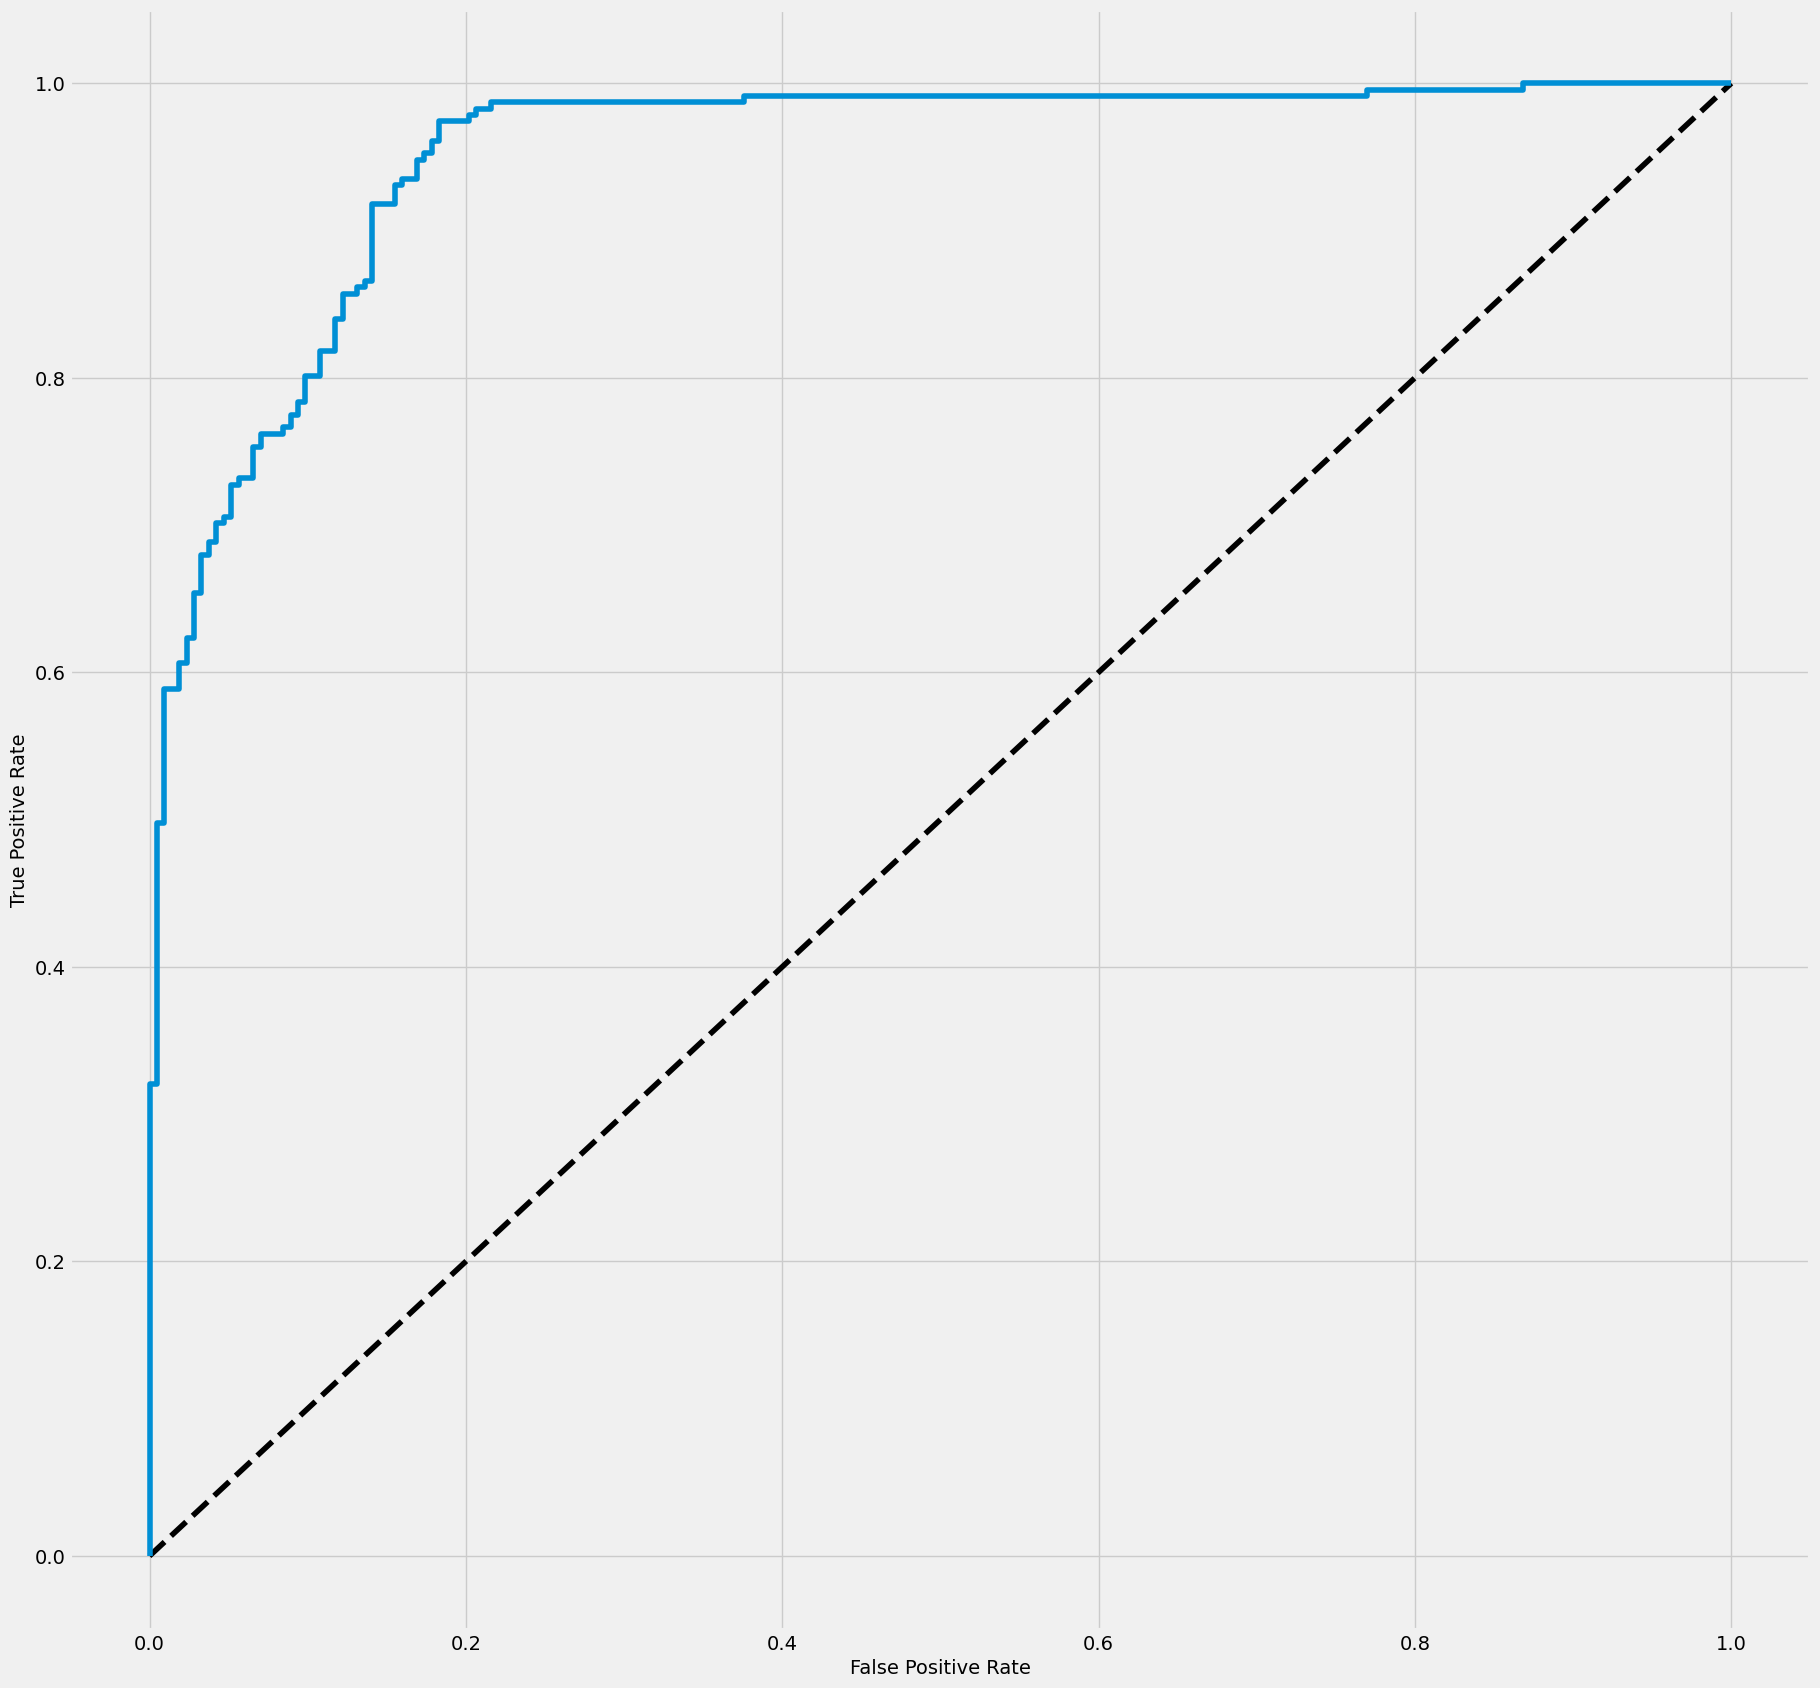

In [200]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion matrix for XGBclassifier:-

In [201]:
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [203]:
confusion_matrix(y_test,y_pred)

array([[183,  30],
       [ 21, 210]], dtype=int64)

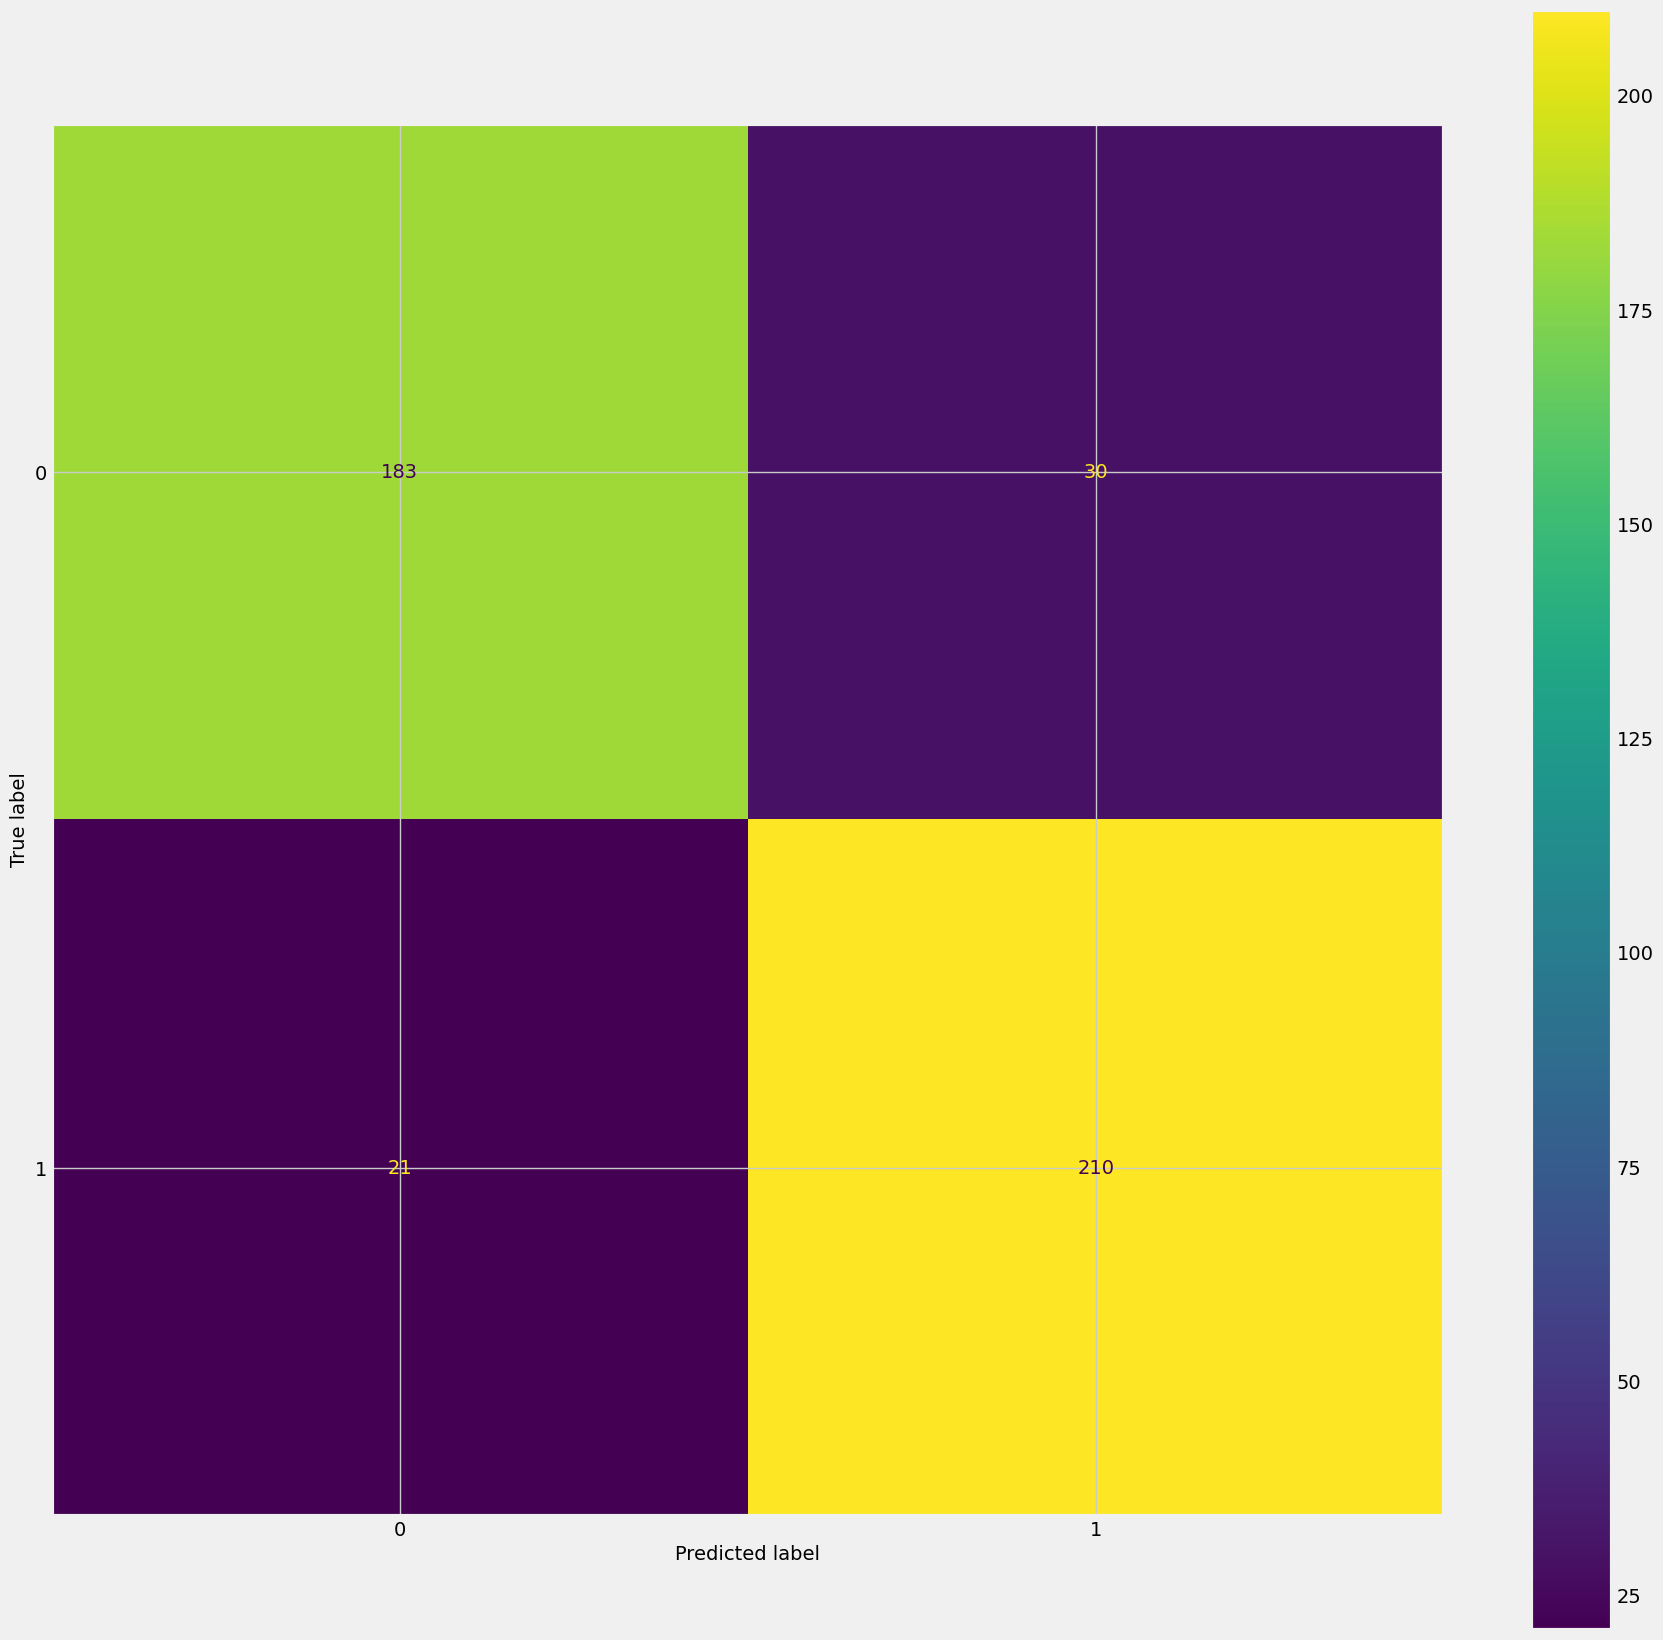

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       213
           1       0.88      0.91      0.89       231

    accuracy                           0.89       444
   macro avg       0.89      0.88      0.88       444
weighted avg       0.89      0.89      0.88       444



In [204]:
predictions=XGB.predict(X_test)
cm=confusion_matrix(y_test,predictions,labels=XGB.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=XGB.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

* With the help of above matrix we are able to understand the number of times we got the correct outputs and the number of times our ML model missed to provide the correct prediction.

# Prediction Results:-

In [206]:
results=pd.DataFrame({
    'Model': ['Logistic','Decision Tree','Random Forest','SVC using Linear','SVC using Poly','SVC using rbf','KNeighbors','Gradient Boosting','GaussianNB','XGB','AdaBoost','ExtraTrees','Ridge','Bagging'],
    'Score': [0.7454,0.8423,0.8716,0.7545,0.8243,0.8378,0.6891,0.8851,0.7537,0.8852,0.8423,0.8738,0.7432,0.8716]})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

Model
Score                    
0.8852                XGB
0.8851  Gradient Boosting
0.8738         ExtraTrees
0.8716      Random Forest
0.8716            Bagging
0.8423      Decision Tree
0.8423           AdaBoost
0.8378      SVC using rbf
0.8243     SVC using Poly
0.7545   SVC using Linear
0.7537         GaussianNB
0.7454           Logistic
0.7432              Ridge
0.6891         KNeighbors

# Conclusion:-

* The result clearly demonstrate that the XGBClassifier algorithm outperforms the other methods,achieving the highest accuracy among all evaluated classifiers.

* RandomForest, ExtraTrees, Bagging and gradient boosting also performed admirably, showing competitive performance with an accuracy close to XGBClassifier.

* however, KNeighbors exhibited relatively lower accuracies, indicating that they might not be the best choices for this specific dataset.

# Saving My Best Model:-

In [207]:
#From sklearn.externals import joblib
import joblib

In [208]:
#Save the model as a object file:
joblib.dump(XGB,'XGBfile.obj')

['XGBfile.obj']

In [209]:
#Load the model from the file:
XGB_from_joblib=joblib.load('XGBfile.obj')

In [210]:
#Use the loaded model to make predictions:
XGB_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,